In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "all"
z_range = "all_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [4]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [5]:
NBINS=10

In [6]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [7]:
assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [8]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            return (shapes.loc[cen_id])
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [9]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [10]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [11]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

1it [00:00,  3.96it/s]

10it [00:00,  5.55it/s]

19it [00:00,  7.71it/s]

28it [00:00, 10.62it/s]

37it [00:00, 14.44it/s]

46it [00:00, 19.27it/s]

55it [00:00, 25.14it/s]

64it [00:00, 31.99it/s]

73it [00:01, 39.52it/s]

82it [00:01, 47.37it/s]

91it [00:01, 54.91it/s]

100it [00:01, 61.90it/s]

109it [00:01, 68.09it/s]

118it [00:01, 73.12it/s]

127it [00:01, 77.07it/s]

136it [00:01, 80.28it/s]

145it [00:01, 82.75it/s]

154it [00:01, 84.62it/s]

163it [00:02, 85.68it/s]

172it [00:02, 86.60it/s]

181it [00:02, 87.38it/s]

190it [00:02, 87.29it/s]

199it [00:02, 87.35it/s]

208it [00:02, 87.69it/s]

217it [00:02, 87.60it/s]

226it [00:02, 87.62it/s]

235it [00:02, 87.78it/s]

244it [00:03, 87.93it/s]

253it [00:03, 87.33it/s]

262it [00:03, 87.68it/s]

271it [00:03, 87.35it/s]

280it [00:03, 87.89it/s]

289it [00:03, 88.39it/s]

298it [00:03, 88.65it/s]

307it [00:03, 88.51it/s]

316it [00:03, 88.43it/s]

325it [00:03, 88.29it/s]

334it [00:04, 87.97it/s]

343it [00:04, 88.18it/s]

352it [00:04, 88.51it/s]

361it [00:04, 88.73it/s]

370it [00:04, 88.78it/s]

379it [00:04, 88.56it/s]

388it [00:04, 88.34it/s]

397it [00:04, 88.15it/s]

406it [00:04, 87.91it/s]

415it [00:04, 87.97it/s]

424it [00:05, 87.79it/s]

433it [00:05, 87.85it/s]

442it [00:05, 88.12it/s]

451it [00:05, 87.76it/s]

460it [00:05, 88.17it/s]

469it [00:05, 88.15it/s]

478it [00:05, 88.49it/s]

487it [00:05, 88.54it/s]

496it [00:05, 88.89it/s]

505it [00:05, 89.02it/s]

514it [00:06, 88.73it/s]

523it [00:06, 88.50it/s]

532it [00:06, 88.37it/s]

541it [00:06, 88.55it/s]

550it [00:06, 88.60it/s]

559it [00:06, 88.40it/s]

568it [00:06, 87.84it/s]

577it [00:06, 87.77it/s]

586it [00:06, 87.79it/s]

595it [00:06, 87.70it/s]

604it [00:07, 87.70it/s]

613it [00:07, 87.83it/s]

622it [00:07, 88.08it/s]

631it [00:07, 88.11it/s]

640it [00:07, 88.11it/s]

649it [00:07, 88.09it/s]

658it [00:07, 88.20it/s]

667it [00:07, 88.51it/s]

676it [00:07, 88.41it/s]

685it [00:08, 87.97it/s]

694it [00:08, 87.90it/s]

703it [00:08, 87.82it/s]

712it [00:08, 87.92it/s]

721it [00:08, 88.09it/s]

730it [00:08, 88.49it/s]

739it [00:08, 88.26it/s]

748it [00:08, 88.08it/s]

757it [00:08, 88.24it/s]

766it [00:08, 88.29it/s]

775it [00:09, 88.20it/s]

784it [00:09, 88.05it/s]

793it [00:09, 88.26it/s]

802it [00:09, 87.90it/s]

811it [00:09, 87.85it/s]

820it [00:09, 88.18it/s]

829it [00:09, 88.21it/s]

838it [00:09, 87.82it/s]

847it [00:09, 87.82it/s]

856it [00:09, 87.96it/s]

865it [00:10, 88.03it/s]

874it [00:10, 87.97it/s]

883it [00:10, 87.96it/s]

892it [00:10, 88.23it/s]

901it [00:10, 88.48it/s]

910it [00:10, 88.45it/s]

919it [00:10, 88.53it/s]

928it [00:10, 88.64it/s]

937it [00:10, 88.53it/s]

946it [00:10, 88.37it/s]

955it [00:11, 88.22it/s]

964it [00:11, 88.24it/s]

973it [00:11, 88.21it/s]

982it [00:11, 88.11it/s]

991it [00:11, 87.95it/s]

1000it [00:11, 88.17it/s]

1009it [00:11, 88.35it/s]

1018it [00:11, 88.52it/s]

1027it [00:11, 88.20it/s]

1036it [00:11, 88.45it/s]

1045it [00:12, 88.27it/s]

1054it [00:12, 87.95it/s]

1063it [00:12, 87.80it/s]

1072it [00:12, 87.83it/s]

1081it [00:12, 87.89it/s]

1090it [00:12, 88.32it/s]

1099it [00:12, 88.55it/s]

1108it [00:12, 88.47it/s]

1117it [00:12, 88.52it/s]

1126it [00:13, 88.36it/s]

1135it [00:13, 88.42it/s]

1144it [00:13, 88.52it/s]

1153it [00:13, 88.76it/s]

1162it [00:13, 88.89it/s]

1171it [00:13, 88.51it/s]

1180it [00:13, 88.70it/s]

1189it [00:13, 88.83it/s]

1198it [00:13, 88.86it/s]

1207it [00:13, 88.89it/s]

1216it [00:14, 88.93it/s]

1225it [00:14, 88.61it/s]

1234it [00:14, 88.27it/s]

1243it [00:14, 88.04it/s]

1252it [00:14, 88.13it/s]

1261it [00:14, 88.02it/s]

1270it [00:14, 87.96it/s]

1279it [00:14, 87.84it/s]

1288it [00:14, 87.58it/s]

1297it [00:14, 87.87it/s]

1306it [00:15, 87.73it/s]

1315it [00:15, 87.65it/s]

1324it [00:15, 87.38it/s]

1333it [00:15, 87.77it/s]

1342it [00:15, 88.11it/s]

1351it [00:15, 88.35it/s]

1360it [00:15, 87.99it/s]

1369it [00:15, 88.21it/s]

1378it [00:15, 88.09it/s]

1387it [00:15, 88.30it/s]

1396it [00:16, 88.50it/s]

1405it [00:16, 88.63it/s]

1414it [00:16, 88.41it/s]

1423it [00:16, 88.68it/s]

1432it [00:16, 87.90it/s]

1441it [00:16, 87.73it/s]

1450it [00:16, 87.79it/s]

1459it [00:16, 87.74it/s]

1468it [00:16, 87.95it/s]

1477it [00:16, 88.26it/s]

1486it [00:17, 88.05it/s]

1495it [00:17, 87.96it/s]

1504it [00:17, 87.39it/s]

1513it [00:17, 86.99it/s]

1522it [00:17, 86.86it/s]

1531it [00:17, 86.71it/s]

1540it [00:17, 86.32it/s]

1549it [00:17, 86.01it/s]

1558it [00:17, 85.97it/s]

1567it [00:18, 86.12it/s]

1576it [00:18, 86.06it/s]

1585it [00:18, 85.86it/s]

1594it [00:18, 85.59it/s]

1603it [00:18, 85.70it/s]

1612it [00:18, 86.20it/s]

1621it [00:18, 86.77it/s]

1630it [00:18, 87.07it/s]

1639it [00:18, 87.28it/s]

1648it [00:18, 87.88it/s]

1657it [00:19, 88.34it/s]

1666it [00:19, 88.46it/s]

1675it [00:19, 88.81it/s]

1684it [00:19, 88.90it/s]

1693it [00:19, 88.88it/s]

1702it [00:19, 89.01it/s]

1711it [00:19, 89.19it/s]

1720it [00:19, 89.16it/s]

1729it [00:19, 89.23it/s]

1738it [00:19, 89.33it/s]

1747it [00:20, 89.37it/s]

1756it [00:20, 88.96it/s]

1765it [00:20, 88.86it/s]

1774it [00:20, 88.64it/s]

1783it [00:20, 88.44it/s]

1792it [00:20, 88.33it/s]

1801it [00:20, 88.19it/s]

1810it [00:20, 88.16it/s]

1819it [00:20, 88.13it/s]

1828it [00:20, 87.80it/s]

1837it [00:21, 88.02it/s]

1846it [00:21, 88.14it/s]

1855it [00:21, 88.07it/s]

1864it [00:21, 88.02it/s]

1873it [00:21, 88.07it/s]

1882it [00:21, 88.15it/s]

1891it [00:21, 88.37it/s]

1900it [00:21, 88.22it/s]

1909it [00:21, 88.19it/s]

1918it [00:22, 88.17it/s]

1927it [00:22, 88.15it/s]

1936it [00:22, 88.10it/s]

1945it [00:22, 87.94it/s]

1954it [00:22, 88.08it/s]

1963it [00:22, 88.32it/s]

1972it [00:22, 88.11it/s]

1981it [00:22, 87.92it/s]

1990it [00:22, 88.09it/s]

1999it [00:22, 88.04it/s]

2008it [00:23, 87.81it/s]

2017it [00:23, 87.82it/s]

2026it [00:23, 88.01it/s]

2035it [00:23, 87.77it/s]

2044it [00:23, 87.73it/s]

2053it [00:23, 87.67it/s]

2062it [00:23, 87.90it/s]

2071it [00:23, 87.89it/s]

2080it [00:23, 87.83it/s]

2089it [00:23, 87.82it/s]

2098it [00:24, 87.89it/s]

2107it [00:24, 87.72it/s]

2116it [00:24, 87.84it/s]

2125it [00:24, 87.88it/s]

2134it [00:24, 88.00it/s]

2143it [00:24, 88.28it/s]

2152it [00:24, 88.18it/s]

2161it [00:24, 88.09it/s]

2170it [00:24, 88.23it/s]

2179it [00:24, 88.07it/s]

2188it [00:25, 88.13it/s]

2197it [00:25, 88.04it/s]

2206it [00:25, 88.18it/s]

2215it [00:25, 88.45it/s]

2224it [00:25, 88.57it/s]

2233it [00:25, 88.30it/s]

2242it [00:25, 88.24it/s]

2251it [00:25, 88.18it/s]

2260it [00:25, 88.15it/s]

2269it [00:25, 88.29it/s]

2278it [00:26, 88.29it/s]

2287it [00:26, 88.49it/s]

2296it [00:26, 88.65it/s]

2305it [00:26, 88.53it/s]

2314it [00:26, 88.24it/s]

2323it [00:26, 88.09it/s]

2332it [00:26, 88.07it/s]

2341it [00:26, 88.37it/s]

2350it [00:26, 88.60it/s]

2359it [00:27, 88.79it/s]

2368it [00:27, 88.80it/s]

2377it [00:27, 88.40it/s]

2386it [00:27, 88.18it/s]

2395it [00:27, 88.35it/s]

2404it [00:27, 88.58it/s]

2413it [00:27, 88.75it/s]

2422it [00:27, 88.42it/s]

2431it [00:27, 88.10it/s]

2440it [00:27, 88.05it/s]

2449it [00:28, 88.05it/s]

2458it [00:28, 87.85it/s]

2467it [00:28, 87.95it/s]

2476it [00:28, 88.01it/s]

2485it [00:28, 87.90it/s]

2494it [00:28, 87.99it/s]

2503it [00:28, 88.16it/s]

2512it [00:28, 88.22it/s]

2521it [00:28, 88.18it/s]

2530it [00:28, 87.93it/s]

2539it [00:29, 88.03it/s]

2548it [00:29, 88.40it/s]

2557it [00:29, 88.33it/s]

2566it [00:29, 88.16it/s]

2575it [00:29, 88.10it/s]

2584it [00:29, 88.06it/s]

2593it [00:29, 88.05it/s]

2602it [00:29, 87.80it/s]

2611it [00:29, 87.93it/s]

2620it [00:29, 87.95it/s]

2629it [00:30, 88.25it/s]

2638it [00:30, 88.51it/s]

2647it [00:30, 88.76it/s]

2656it [00:30, 88.50it/s]

2665it [00:30, 88.53it/s]

2674it [00:30, 88.46it/s]

2683it [00:30, 88.34it/s]

2692it [00:30, 88.17it/s]

2701it [00:30, 87.88it/s]

2710it [00:30, 87.70it/s]

2719it [00:31, 87.86it/s]

2728it [00:31, 87.92it/s]

2737it [00:31, 87.66it/s]

2746it [00:31, 87.99it/s]

2755it [00:31, 87.94it/s]

2764it [00:31, 88.26it/s]

2773it [00:31, 88.46it/s]

2782it [00:31, 88.37it/s]

2791it [00:31, 88.33it/s]

2800it [00:32, 88.12it/s]

2809it [00:32, 88.31it/s]

2818it [00:32, 88.30it/s]

2827it [00:32, 87.71it/s]

2836it [00:32, 87.60it/s]

2845it [00:32, 87.61it/s]

2854it [00:32, 87.57it/s]

2863it [00:32, 87.55it/s]

2872it [00:32, 87.57it/s]

2881it [00:32, 87.41it/s]

2890it [00:33, 87.63it/s]

2899it [00:33, 87.66it/s]

2908it [00:33, 87.75it/s]

2917it [00:33, 87.59it/s]

2926it [00:33, 87.59it/s]

2935it [00:33, 87.61it/s]

2944it [00:33, 87.74it/s]

2953it [00:33, 88.13it/s]

2962it [00:33, 88.39it/s]

2971it [00:33, 88.23it/s]

2980it [00:34, 88.20it/s]

2989it [00:34, 88.07it/s]

2998it [00:34, 88.01it/s]

3007it [00:34, 88.07it/s]

3016it [00:34, 88.10it/s]

3025it [00:34, 88.16it/s]

3034it [00:34, 87.98it/s]

3043it [00:34, 87.80it/s]

3052it [00:34, 87.81it/s]

3061it [00:34, 87.93it/s]

3070it [00:35, 87.30it/s]

3079it [00:35, 87.41it/s]

3088it [00:35, 87.39it/s]

3097it [00:35, 87.21it/s]

3106it [00:35, 87.16it/s]

3115it [00:35, 87.27it/s]

3124it [00:35, 87.25it/s]

3133it [00:35, 87.35it/s]

3142it [00:35, 87.84it/s]

3151it [00:36, 88.39it/s]

3160it [00:36, 88.78it/s]

3169it [00:36, 88.91it/s]

3178it [00:36, 88.40it/s]

3187it [00:36, 87.21it/s]

3196it [00:36, 86.17it/s]

3205it [00:36, 86.32it/s]

3214it [00:36, 86.64it/s]

3223it [00:36, 86.75it/s]

3232it [00:36, 86.72it/s]

3241it [00:37, 87.21it/s]

3250it [00:37, 87.56it/s]

3259it [00:37, 87.65it/s]

3268it [00:37, 87.64it/s]

3277it [00:37, 87.39it/s]

3286it [00:37, 87.70it/s]

3295it [00:37, 87.94it/s]

3304it [00:37, 88.27it/s]

3313it [00:37, 88.48it/s]

3322it [00:37, 88.66it/s]

3331it [00:38, 88.78it/s]

3340it [00:38, 88.44it/s]

3349it [00:38, 88.38it/s]

3358it [00:38, 88.05it/s]

3367it [00:38, 87.74it/s]

3376it [00:38, 87.57it/s]

3385it [00:38, 87.88it/s]

3394it [00:38, 87.94it/s]

3403it [00:38, 87.56it/s]

3412it [00:38, 87.44it/s]

3421it [00:39, 87.94it/s]

3430it [00:39, 87.98it/s]

3439it [00:39, 88.26it/s]

3448it [00:39, 88.45it/s]

3457it [00:39, 88.26it/s]

3466it [00:39, 88.08it/s]

3475it [00:39, 88.21it/s]

3484it [00:39, 87.90it/s]

3493it [00:39, 87.73it/s]

3502it [00:40, 87.72it/s]

3511it [00:40, 87.61it/s]

3520it [00:40, 87.78it/s]

3529it [00:40, 88.04it/s]

3538it [00:40, 88.34it/s]

3547it [00:40, 88.16it/s]

3556it [00:40, 88.35it/s]

3565it [00:40, 88.26it/s]

3574it [00:40, 88.12it/s]

3583it [00:40, 87.90it/s]

3592it [00:41, 88.23it/s]

3601it [00:41, 88.38it/s]

3610it [00:41, 88.79it/s]

3619it [00:41, 88.98it/s]

3628it [00:41, 89.12it/s]

3637it [00:41, 89.14it/s]

3646it [00:41, 88.72it/s]

3655it [00:41, 88.35it/s]

3664it [00:41, 88.21it/s]

3673it [00:41, 88.18it/s]

3682it [00:42, 88.10it/s]

3691it [00:42, 88.00it/s]

3700it [00:42, 88.00it/s]

3709it [00:42, 88.03it/s]

3718it [00:42, 87.81it/s]

3727it [00:42, 87.89it/s]

3736it [00:42, 87.92it/s]

3745it [00:42, 87.97it/s]

3754it [00:42, 87.86it/s]

3763it [00:42, 87.99it/s]

3772it [00:43, 87.99it/s]

3781it [00:43, 88.32it/s]

3790it [00:43, 88.64it/s]

3799it [00:43, 88.52it/s]

3808it [00:43, 88.33it/s]

3817it [00:43, 88.60it/s]

3826it [00:43, 88.59it/s]

3835it [00:43, 88.88it/s]

3844it [00:43, 89.18it/s]

3853it [00:43, 89.17it/s]

3862it [00:44, 89.09it/s]

3871it [00:44, 88.79it/s]

3880it [00:44, 88.56it/s]

3889it [00:44, 87.85it/s]

3898it [00:44, 88.11it/s]

3907it [00:44, 88.32it/s]

3916it [00:44, 87.89it/s]

3925it [00:44, 88.04it/s]

3934it [00:44, 87.54it/s]

3943it [00:45, 87.67it/s]

3952it [00:45, 87.74it/s]

3961it [00:45, 87.46it/s]

3970it [00:45, 87.24it/s]

3979it [00:45, 87.37it/s]

3988it [00:45, 87.55it/s]

3997it [00:45, 88.00it/s]

4006it [00:45, 88.08it/s]

4015it [00:45, 87.77it/s]

4024it [00:45, 87.84it/s]

4033it [00:46, 87.80it/s]

4042it [00:46, 87.88it/s]

4051it [00:46, 87.88it/s]

4060it [00:46, 87.72it/s]

4069it [00:46, 87.71it/s]

4078it [00:46, 88.19it/s]

4087it [00:46, 88.34it/s]

4096it [00:46, 88.58it/s]

4105it [00:46, 88.96it/s]

4114it [00:46, 88.69it/s]

4123it [00:47, 88.40it/s]

4132it [00:47, 88.28it/s]

4141it [00:47, 88.16it/s]

4150it [00:47, 88.07it/s]

4159it [00:47, 87.94it/s]

4168it [00:47, 88.17it/s]

4178it [00:47, 89.35it/s]

4187it [00:47, 89.16it/s]

4196it [00:47, 88.90it/s]

4205it [00:47, 88.81it/s]

4214it [00:48, 88.28it/s]

4223it [00:48, 88.29it/s]

4232it [00:48, 88.12it/s]

4241it [00:48, 87.90it/s]

4250it [00:48, 88.03it/s]

4259it [00:48, 87.95it/s]

4268it [00:48, 87.62it/s]

4277it [00:48, 87.57it/s]

4286it [00:48, 87.65it/s]

4295it [00:49, 87.05it/s]

4304it [00:49, 87.32it/s]

4313it [00:49, 87.68it/s]

4322it [00:49, 87.72it/s]

4331it [00:49, 86.96it/s]

4340it [00:49, 87.46it/s]

4349it [00:49, 87.77it/s]

4358it [00:49, 88.26it/s]

4367it [00:49, 88.58it/s]

4376it [00:49, 88.85it/s]

4385it [00:50, 88.68it/s]

4394it [00:50, 88.78it/s]

4403it [00:50, 88.94it/s]

4412it [00:50, 88.77it/s]

4421it [00:50, 88.48it/s]

4430it [00:50, 88.66it/s]

4439it [00:50, 88.66it/s]

4448it [00:50, 88.77it/s]

4457it [00:50, 88.77it/s]

4466it [00:50, 88.84it/s]

4475it [00:51, 88.79it/s]

4484it [00:51, 88.40it/s]

4493it [00:51, 88.56it/s]

4502it [00:51, 88.79it/s]

4511it [00:51, 88.06it/s]

4520it [00:51, 88.29it/s]

4529it [00:51, 87.79it/s]

4538it [00:51, 88.05it/s]

4547it [00:51, 88.04it/s]

4556it [00:51, 88.15it/s]

4565it [00:52, 88.17it/s]

4574it [00:52, 88.08it/s]

4583it [00:52, 88.03it/s]

4592it [00:52, 88.00it/s]

4601it [00:52, 87.78it/s]

4610it [00:52, 87.90it/s]

4619it [00:52, 87.86it/s]

4628it [00:52, 87.78it/s]

4637it [00:52, 88.04it/s]

4646it [00:52, 88.14it/s]

4655it [00:53, 88.20it/s]

4664it [00:53, 88.34it/s]

4673it [00:53, 88.27it/s]

4682it [00:53, 88.43it/s]

4691it [00:53, 88.40it/s]

4700it [00:53, 88.25it/s]

4709it [00:53, 88.49it/s]

4718it [00:53, 88.28it/s]

4727it [00:53, 88.20it/s]

4736it [00:54, 88.48it/s]

4745it [00:54, 88.55it/s]

4754it [00:54, 88.72it/s]

4763it [00:54, 88.67it/s]

4772it [00:54, 88.28it/s]

4781it [00:54, 88.27it/s]

4790it [00:54, 88.41it/s]

4799it [00:54, 88.30it/s]

4808it [00:54, 87.82it/s]

4817it [00:54, 87.94it/s]

4826it [00:55, 88.15it/s]

4835it [00:55, 87.95it/s]

4844it [00:55, 87.90it/s]

4853it [00:55, 88.09it/s]

4862it [00:55, 88.35it/s]

4871it [00:55, 87.97it/s]

4880it [00:55, 88.10it/s]

4889it [00:55, 87.33it/s]

4898it [00:55, 87.46it/s]

4907it [00:55, 87.45it/s]

4916it [00:56, 87.79it/s]

4925it [00:56, 88.02it/s]

4934it [00:56, 88.30it/s]

4943it [00:56, 88.35it/s]

4952it [00:56, 87.19it/s]

4961it [00:56, 86.89it/s]

4970it [00:56, 86.94it/s]

4979it [00:56, 87.23it/s]

4988it [00:56, 87.35it/s]

4997it [00:57, 74.00it/s]

5006it [00:57, 77.60it/s]

5015it [00:57, 80.52it/s]

5024it [00:57, 82.58it/s]

5033it [00:57, 83.90it/s]

5042it [00:57, 85.01it/s]

5051it [00:57, 85.82it/s]

5060it [00:57, 86.49it/s]

5069it [00:57, 86.80it/s]

5078it [00:57, 87.08it/s]

5087it [00:58, 87.19it/s]

5096it [00:58, 87.29it/s]

5105it [00:58, 87.40it/s]

5114it [00:58, 87.45it/s]

5123it [00:58, 87.53it/s]

5132it [00:58, 87.56it/s]

5141it [00:58, 87.67it/s]

5150it [00:58, 88.05it/s]

5159it [00:58, 87.96it/s]

5168it [00:58, 88.16it/s]

5177it [00:59, 88.05it/s]

5186it [00:59, 88.10it/s]

5195it [00:59, 88.26it/s]

5204it [00:59, 88.29it/s]

5213it [00:59, 88.31it/s]

5222it [00:59, 87.96it/s]

5231it [00:59, 87.94it/s]

5240it [00:59, 88.44it/s]

5249it [00:59, 88.79it/s]

5258it [01:00, 87.75it/s]

5267it [01:00, 88.17it/s]

5276it [01:00, 88.13it/s]

5285it [01:00, 88.09it/s]

5294it [01:00, 87.69it/s]

5303it [01:00, 87.55it/s]

5312it [01:00, 87.73it/s]

5321it [01:00, 87.63it/s]

5330it [01:00, 87.64it/s]

5339it [01:00, 87.72it/s]

5348it [01:01, 87.82it/s]

5357it [01:01, 87.88it/s]

5366it [01:01, 88.00it/s]

5375it [01:01, 88.36it/s]

5384it [01:01, 88.50it/s]

5393it [01:01, 88.34it/s]

5402it [01:01, 88.09it/s]

5411it [01:01, 88.07it/s]

5420it [01:01, 88.09it/s]

5429it [01:01, 88.26it/s]

5438it [01:02, 88.56it/s]

5447it [01:02, 88.83it/s]

5456it [01:02, 88.63it/s]

5465it [01:02, 88.31it/s]

5474it [01:02, 88.16it/s]

5483it [01:02, 87.87it/s]

5492it [01:02, 88.29it/s]

5501it [01:02, 88.47it/s]

5510it [01:02, 88.29it/s]

5519it [01:02, 88.32it/s]

5528it [01:03, 88.53it/s]

5537it [01:03, 88.47it/s]

5546it [01:03, 88.40it/s]

5555it [01:03, 88.58it/s]

5564it [01:03, 88.62it/s]

5573it [01:03, 88.55it/s]

5582it [01:03, 88.58it/s]

5591it [01:03, 88.64it/s]

5600it [01:03, 88.48it/s]

5609it [01:03, 88.72it/s]

5618it [01:04, 88.53it/s]

5627it [01:04, 88.49it/s]

5636it [01:04, 88.63it/s]

5645it [01:04, 88.39it/s]

5654it [01:04, 88.64it/s]

5663it [01:04, 88.51it/s]

5672it [01:04, 88.14it/s]

5681it [01:04, 88.04it/s]

5690it [01:04, 87.96it/s]

5699it [01:05, 88.25it/s]

5708it [01:05, 88.26it/s]

5717it [01:05, 88.28it/s]

5726it [01:05, 88.45it/s]

5735it [01:05, 88.14it/s]

5744it [01:05, 88.22it/s]

5753it [01:05, 88.20it/s]

5762it [01:05, 88.14it/s]

5771it [01:05, 88.04it/s]

5780it [01:05, 87.82it/s]

5789it [01:06, 87.69it/s]

5798it [01:06, 87.54it/s]

5807it [01:06, 87.52it/s]

5816it [01:06, 87.73it/s]

5825it [01:06, 87.42it/s]

5834it [01:06, 87.58it/s]

5843it [01:06, 87.85it/s]

5852it [01:06, 88.31it/s]

5861it [01:06, 88.52it/s]

5870it [01:06, 88.75it/s]

5879it [01:07, 88.83it/s]

5888it [01:07, 88.70it/s]

5897it [01:07, 88.71it/s]

5906it [01:07, 88.90it/s]

5915it [01:07, 89.15it/s]

5924it [01:07, 89.26it/s]

5933it [01:07, 89.09it/s]

5942it [01:07, 89.17it/s]

5951it [01:07, 88.95it/s]

5960it [01:07, 88.66it/s]

5969it [01:08, 88.39it/s]

5978it [01:08, 88.05it/s]

5987it [01:08, 88.05it/s]

5996it [01:08, 88.04it/s]

6005it [01:08, 88.29it/s]

6014it [01:08, 88.56it/s]

6023it [01:08, 88.25it/s]

6032it [01:08, 88.07it/s]

6041it [01:08, 88.22it/s]

6050it [01:08, 88.52it/s]

6059it [01:09, 88.45it/s]

6068it [01:09, 88.30it/s]

6077it [01:09, 88.23it/s]

6086it [01:09, 88.03it/s]

6095it [01:09, 88.23it/s]

6104it [01:09, 88.07it/s]

6113it [01:09, 88.29it/s]

6122it [01:09, 88.53it/s]

6131it [01:09, 88.67it/s]

6140it [01:09, 88.71it/s]

6149it [01:10, 88.44it/s]

6158it [01:10, 88.57it/s]

6167it [01:10, 88.75it/s]

6176it [01:10, 88.55it/s]

6185it [01:10, 88.40it/s]

6194it [01:10, 88.33it/s]

6203it [01:10, 88.34it/s]

6212it [01:10, 87.95it/s]

6221it [01:10, 88.03it/s]

6230it [01:11, 88.09it/s]

6239it [01:11, 88.25it/s]

6248it [01:11, 87.98it/s]

6257it [01:11, 88.09it/s]

6266it [01:11, 87.92it/s]

6275it [01:11, 87.65it/s]

6284it [01:11, 87.62it/s]

6293it [01:11, 87.79it/s]

6302it [01:11, 87.63it/s]

6311it [01:11, 87.89it/s]

6320it [01:12, 88.14it/s]

6329it [01:12, 88.11it/s]

6338it [01:12, 87.97it/s]

6347it [01:12, 88.09it/s]

6356it [01:12, 88.39it/s]

6365it [01:12, 88.59it/s]

6374it [01:12, 88.71it/s]

6383it [01:12, 88.63it/s]

6392it [01:12, 88.85it/s]

6401it [01:12, 89.16it/s]

6411it [01:13, 89.36it/s]

6420it [01:13, 88.55it/s]

6429it [01:13, 88.78it/s]

6438it [01:13, 88.90it/s]

6447it [01:13, 88.96it/s]

6456it [01:13, 88.90it/s]

6465it [01:13, 88.51it/s]

6474it [01:13, 88.33it/s]

6483it [01:13, 88.29it/s]

6492it [01:13, 88.43it/s]

6501it [01:14, 88.78it/s]

6510it [01:14, 88.93it/s]

6519it [01:14, 88.75it/s]

6528it [01:14, 89.00it/s]

6538it [01:14, 89.37it/s]

6547it [01:14, 89.29it/s]

6556it [01:14, 89.21it/s]

6565it [01:14, 88.95it/s]

6574it [01:14, 88.70it/s]

6583it [01:15, 88.89it/s]

6592it [01:15, 89.00it/s]

6601it [01:15, 88.61it/s]

6610it [01:15, 88.55it/s]

6619it [01:15, 88.79it/s]

6628it [01:15, 88.85it/s]

6637it [01:15, 88.81it/s]

6646it [01:15, 88.46it/s]

6655it [01:15, 88.30it/s]

6664it [01:15, 88.09it/s]

6673it [01:16, 88.38it/s]

6682it [01:16, 88.57it/s]

6691it [01:16, 88.17it/s]

6700it [01:16, 88.23it/s]

6709it [01:16, 87.32it/s]

6718it [01:16, 83.54it/s]

6727it [01:16, 84.22it/s]

6736it [01:16, 85.31it/s]

6745it [01:16, 86.19it/s]

6754it [01:16, 86.32it/s]

6763it [01:17, 86.93it/s]

6772it [01:17, 87.15it/s]

6781it [01:17, 87.42it/s]

6790it [01:17, 87.88it/s]

6799it [01:17, 88.18it/s]

6808it [01:17, 88.23it/s]

6817it [01:17, 88.55it/s]

6826it [01:17, 88.50it/s]

6835it [01:17, 88.40it/s]

6844it [01:17, 88.31it/s]

6853it [01:18, 88.27it/s]

6862it [01:18, 88.56it/s]

6871it [01:18, 88.58it/s]

6880it [01:18, 88.82it/s]

6889it [01:18, 88.89it/s]

6898it [01:18, 88.43it/s]

6907it [01:18, 88.15it/s]

6916it [01:18, 87.86it/s]

6925it [01:18, 88.00it/s]

6934it [01:18, 88.19it/s]

6943it [01:19, 88.47it/s]

6952it [01:19, 88.56it/s]

6961it [01:19, 88.80it/s]

6970it [01:19, 88.56it/s]

6979it [01:19, 88.22it/s]

6989it [01:19, 88.91it/s]

6998it [01:19, 88.31it/s]

7007it [01:19, 88.16it/s]

7016it [01:19, 88.40it/s]

7025it [01:20, 88.50it/s]

7034it [01:20, 88.56it/s]

7043it [01:20, 88.51it/s]

7052it [01:20, 88.45it/s]

7061it [01:20, 88.43it/s]

7070it [01:20, 88.12it/s]

7079it [01:20, 88.14it/s]

7088it [01:20, 87.87it/s]

7097it [01:20, 87.71it/s]

7106it [01:20, 88.17it/s]

7115it [01:21, 88.36it/s]

7124it [01:21, 88.20it/s]

7133it [01:21, 88.02it/s]

7142it [01:21, 88.32it/s]

7151it [01:21, 88.22it/s]

7160it [01:21, 88.09it/s]

7169it [01:21, 88.29it/s]

7178it [01:21, 87.76it/s]

7187it [01:21, 88.03it/s]

7196it [01:21, 88.07it/s]

7205it [01:22, 88.02it/s]

7214it [01:22, 88.08it/s]

7223it [01:22, 88.17it/s]

7232it [01:22, 88.32it/s]

7241it [01:22, 88.20it/s]

7250it [01:22, 88.47it/s]

7259it [01:22, 88.25it/s]

7268it [01:22, 88.33it/s]

7277it [01:22, 88.43it/s]

7286it [01:22, 88.60it/s]

7295it [01:23, 88.74it/s]

7304it [01:23, 88.82it/s]

7313it [01:23, 88.91it/s]

7322it [01:23, 88.90it/s]

7331it [01:23, 88.64it/s]

7340it [01:23, 88.48it/s]

7349it [01:23, 88.27it/s]

7358it [01:23, 88.15it/s]

7367it [01:23, 88.28it/s]

7376it [01:24, 88.02it/s]

7385it [01:24, 88.14it/s]

7394it [01:24, 88.22it/s]

7403it [01:24, 88.19it/s]

7412it [01:24, 88.25it/s]

7421it [01:24, 88.22it/s]

7430it [01:24, 88.41it/s]

7439it [01:24, 88.61it/s]

7448it [01:24, 88.45it/s]

7457it [01:24, 88.32it/s]

7466it [01:25, 88.10it/s]

7475it [01:25, 87.99it/s]

7484it [01:25, 88.13it/s]

7493it [01:25, 88.19it/s]

7502it [01:25, 88.10it/s]

7511it [01:25, 87.97it/s]

7520it [01:25, 88.00it/s]

7529it [01:25, 88.38it/s]

7538it [01:25, 88.66it/s]

7547it [01:25, 88.48it/s]

7556it [01:26, 88.71it/s]

7565it [01:26, 88.61it/s]

7574it [01:26, 88.45it/s]

7583it [01:26, 88.55it/s]

7592it [01:26, 88.62it/s]

7601it [01:26, 88.46it/s]

7610it [01:26, 88.34it/s]

7619it [01:26, 88.20it/s]

7628it [01:26, 88.26it/s]

7637it [01:26, 88.43it/s]

7646it [01:27, 88.49it/s]

7655it [01:27, 88.59it/s]

7664it [01:27, 88.81it/s]

7673it [01:27, 88.67it/s]

7682it [01:27, 88.69it/s]

7691it [01:27, 88.58it/s]

7700it [01:27, 88.63it/s]

7709it [01:27, 88.28it/s]

7718it [01:27, 88.47it/s]

7727it [01:27, 88.42it/s]

7736it [01:28, 88.49it/s]

7745it [01:28, 88.62it/s]

7754it [01:28, 88.83it/s]

7763it [01:28, 88.66it/s]

7772it [01:28, 88.73it/s]

7781it [01:28, 88.92it/s]

7790it [01:28, 88.73it/s]

7799it [01:28, 88.81it/s]

7808it [01:28, 88.87it/s]

7817it [01:28, 88.56it/s]

7826it [01:29, 88.14it/s]

7835it [01:29, 87.93it/s]

7844it [01:29, 87.87it/s]

7853it [01:29, 87.71it/s]

7862it [01:29, 87.95it/s]

7871it [01:29, 87.55it/s]

7880it [01:29, 87.44it/s]

7889it [01:29, 87.40it/s]

7898it [01:29, 87.23it/s]

7907it [01:30, 87.37it/s]

7916it [01:30, 87.63it/s]

7926it [01:30, 89.90it/s]

7936it [01:30, 89.26it/s]

7945it [01:30, 88.92it/s]

7954it [01:30, 88.65it/s]

7963it [01:30, 88.75it/s]

7972it [01:30, 88.45it/s]

7981it [01:30, 88.53it/s]

7990it [01:30, 88.71it/s]

7999it [01:31, 88.34it/s]

8008it [01:31, 88.14it/s]

8017it [01:31, 88.10it/s]

8026it [01:31, 87.86it/s]

8035it [01:31, 88.18it/s]

8044it [01:31, 88.43it/s]

8053it [01:31, 88.03it/s]

8062it [01:31, 87.94it/s]

8071it [01:31, 87.95it/s]

8080it [01:31, 87.97it/s]

8089it [01:32, 88.15it/s]

8098it [01:32, 88.38it/s]

8107it [01:32, 88.51it/s]

8116it [01:32, 88.52it/s]

8125it [01:32, 88.45it/s]

8134it [01:32, 88.49it/s]

8143it [01:32, 88.21it/s]

8152it [01:32, 88.03it/s]

8161it [01:32, 88.07it/s]

8170it [01:32, 88.45it/s]

8179it [01:33, 88.74it/s]

8188it [01:33, 88.92it/s]

8197it [01:33, 89.04it/s]

8206it [01:33, 89.24it/s]

8215it [01:33, 89.22it/s]

8224it [01:33, 88.82it/s]

8233it [01:33, 88.78it/s]

8242it [01:33, 88.63it/s]

8251it [01:33, 88.48it/s]

8260it [01:34, 88.56it/s]

8269it [01:34, 88.43it/s]

8278it [01:34, 88.76it/s]

8287it [01:34, 89.09it/s]

8297it [01:34, 89.40it/s]

8306it [01:34, 89.22it/s]

8315it [01:34, 88.77it/s]

8324it [01:34, 88.58it/s]

8333it [01:34, 88.28it/s]

8342it [01:34, 88.06it/s]

8351it [01:35, 88.00it/s]

8360it [01:35, 88.05it/s]

8369it [01:35, 88.32it/s]

8378it [01:35, 88.47it/s]

8387it [01:35, 88.24it/s]

8396it [01:35, 88.31it/s]

8405it [01:35, 88.54it/s]

8414it [01:35, 88.64it/s]

8423it [01:35, 88.34it/s]

8432it [01:35, 88.47it/s]

8441it [01:36, 87.94it/s]

8450it [01:36, 87.85it/s]

8459it [01:36, 87.88it/s]

8468it [01:36, 87.91it/s]

8477it [01:36, 86.40it/s]

8486it [01:36, 86.11it/s]

8495it [01:36, 86.41it/s]

8504it [01:36, 86.91it/s]

8513it [01:36, 87.35it/s]

8522it [01:36, 87.42it/s]

8531it [01:37, 87.66it/s]

8540it [01:37, 87.36it/s]

8549it [01:37, 87.41it/s]

8558it [01:37, 87.67it/s]

8567it [01:37, 87.87it/s]

8576it [01:37, 87.79it/s]

8585it [01:37, 87.65it/s]

8594it [01:37, 87.66it/s]

8603it [01:37, 87.84it/s]

8612it [01:38, 87.73it/s]

8621it [01:38, 87.66it/s]

8630it [01:38, 87.41it/s]

8639it [01:38, 87.34it/s]

8648it [01:38, 87.46it/s]

8657it [01:38, 87.80it/s]

8666it [01:38, 87.87it/s]

8675it [01:38, 87.79it/s]

8684it [01:38, 87.89it/s]

8693it [01:38, 87.77it/s]

8702it [01:39, 87.85it/s]

8712it [01:39, 88.68it/s]

8721it [01:39, 88.52it/s]

8730it [01:39, 88.45it/s]

8739it [01:39, 88.32it/s]

8748it [01:39, 88.15it/s]

8757it [01:39, 87.88it/s]

8766it [01:39, 87.55it/s]

8775it [01:39, 87.69it/s]

8784it [01:39, 87.63it/s]

8793it [01:40, 87.68it/s]

8802it [01:40, 87.90it/s]

8811it [01:40, 87.81it/s]

8820it [01:40, 87.67it/s]

8829it [01:40, 87.86it/s]

8838it [01:40, 88.19it/s]

8847it [01:40, 88.05it/s]

8856it [01:40, 88.03it/s]

8865it [01:40, 87.93it/s]

8874it [01:40, 88.23it/s]

8883it [01:41, 88.55it/s]

8892it [01:41, 88.76it/s]

8901it [01:41, 88.63it/s]

8910it [01:41, 88.61it/s]

8919it [01:41, 87.54it/s]

8928it [01:41, 87.60it/s]

8937it [01:41, 87.83it/s]

8946it [01:41, 88.21it/s]

8955it [01:41, 88.30it/s]

8964it [01:42, 86.92it/s]

8973it [01:42, 87.42it/s]

8982it [01:42, 87.87it/s]

8991it [01:42, 87.91it/s]

9000it [01:42, 87.96it/s]

9009it [01:42, 88.03it/s]

9018it [01:42, 88.27it/s]

9027it [01:42, 88.31it/s]

9036it [01:42, 88.09it/s]

9045it [01:42, 87.94it/s]

9054it [01:43, 88.00it/s]

9063it [01:43, 88.15it/s]

9072it [01:43, 87.98it/s]

9081it [01:43, 88.20it/s]

9090it [01:43, 88.45it/s]

9099it [01:43, 88.50it/s]

9108it [01:43, 88.56it/s]

9117it [01:43, 88.64it/s]

9126it [01:43, 88.32it/s]

9135it [01:43, 88.20it/s]

9144it [01:44, 88.26it/s]

9153it [01:44, 88.50it/s]

9162it [01:44, 88.37it/s]

9171it [01:44, 88.45it/s]

9180it [01:44, 88.23it/s]

9189it [01:44, 88.06it/s]

9198it [01:44, 88.08it/s]

9207it [01:44, 88.14it/s]

9216it [01:44, 87.94it/s]

9225it [01:44, 87.99it/s]

9234it [01:45, 87.97it/s]

9243it [01:45, 88.08it/s]

9252it [01:45, 88.39it/s]

9261it [01:45, 88.41it/s]

9270it [01:45, 88.10it/s]

9279it [01:45, 87.76it/s]

9288it [01:45, 87.67it/s]

9297it [01:45, 87.90it/s]

9306it [01:45, 87.74it/s]

9315it [01:45, 87.85it/s]

9324it [01:46, 87.98it/s]

9333it [01:46, 87.77it/s]

9342it [01:46, 88.16it/s]

9351it [01:46, 88.49it/s]

9360it [01:46, 88.28it/s]

9369it [01:46, 88.36it/s]

9378it [01:46, 88.51it/s]

9387it [01:46, 88.21it/s]

9396it [01:46, 88.14it/s]

9405it [01:47, 88.01it/s]

9414it [01:47, 88.14it/s]

9423it [01:47, 88.13it/s]

9432it [01:47, 88.27it/s]

9441it [01:47, 88.22it/s]

9450it [01:47, 88.19it/s]

9459it [01:47, 87.78it/s]

9468it [01:47, 87.61it/s]

9477it [01:47, 87.56it/s]

9486it [01:47, 87.68it/s]

9495it [01:48, 87.81it/s]

9504it [01:48, 87.87it/s]

9513it [01:48, 87.57it/s]

9522it [01:48, 87.98it/s]

9531it [01:48, 88.23it/s]

9540it [01:48, 88.52it/s]

9549it [01:48, 88.42it/s]

9558it [01:48, 88.35it/s]

9567it [01:48, 87.97it/s]

9576it [01:48, 88.31it/s]

9585it [01:49, 88.29it/s]

9594it [01:49, 87.83it/s]

9603it [01:49, 88.03it/s]

9612it [01:49, 88.15it/s]

9621it [01:49, 88.34it/s]

9630it [01:49, 88.30it/s]

9639it [01:49, 88.05it/s]

9648it [01:49, 87.98it/s]

9657it [01:49, 87.91it/s]

9666it [01:49, 88.06it/s]

9675it [01:50, 88.13it/s]

9684it [01:50, 88.31it/s]

9693it [01:50, 88.27it/s]

9702it [01:50, 88.15it/s]

9711it [01:50, 88.20it/s]

9720it [01:50, 88.40it/s]

9729it [01:50, 88.18it/s]

9738it [01:50, 88.13it/s]

9747it [01:50, 88.32it/s]

9756it [01:50, 88.33it/s]

9765it [01:51, 87.72it/s]

9774it [01:51, 87.25it/s]

9783it [01:51, 86.55it/s]

9792it [01:51, 86.29it/s]

9801it [01:51, 85.91it/s]

9810it [01:51, 85.59it/s]

9819it [01:51, 85.32it/s]

9828it [01:51, 85.98it/s]

9837it [01:51, 86.73it/s]

9846it [01:52, 87.07it/s]

9855it [01:52, 87.51it/s]

9864it [01:52, 87.42it/s]

9873it [01:52, 87.40it/s]

9882it [01:52, 87.46it/s]

9891it [01:52, 87.64it/s]

9900it [01:52, 87.32it/s]

9909it [01:52, 87.46it/s]

9918it [01:52, 87.42it/s]

9927it [01:52, 87.40it/s]

9936it [01:53, 87.47it/s]

9945it [01:53, 87.58it/s]

9954it [01:53, 87.76it/s]

9963it [01:53, 87.86it/s]

9972it [01:53, 87.35it/s]

9981it [01:53, 87.40it/s]

9990it [01:53, 87.51it/s]

9999it [01:53, 87.93it/s]

10008it [01:53, 87.96it/s]

10017it [01:53, 87.91it/s]

10026it [01:54, 87.91it/s]

10035it [01:54, 88.25it/s]

10044it [01:54, 88.35it/s]

10053it [01:54, 88.50it/s]

10062it [01:54, 88.60it/s]

10071it [01:54, 88.39it/s]

10080it [01:54, 87.92it/s]

10089it [01:54, 87.73it/s]

10098it [01:54, 87.81it/s]

10107it [01:55, 87.18it/s]

10116it [01:55, 87.01it/s]

10125it [01:55, 87.21it/s]

10134it [01:55, 87.39it/s]

10143it [01:55, 87.49it/s]

10152it [01:55, 87.68it/s]

10161it [01:55, 87.54it/s]

10170it [01:55, 87.55it/s]

10179it [01:55, 88.05it/s]

10188it [01:55, 88.08it/s]

10197it [01:56, 88.22it/s]

10206it [01:56, 88.52it/s]

10215it [01:56, 88.11it/s]

10224it [01:56, 88.16it/s]

10233it [01:56, 87.55it/s]

10242it [01:56, 87.17it/s]

10251it [01:56, 87.36it/s]

10260it [01:56, 87.45it/s]

10269it [01:56, 87.55it/s]

10278it [01:56, 87.41it/s]

10287it [01:57, 87.53it/s]

10296it [01:57, 87.54it/s]

10305it [01:57, 87.28it/s]

10314it [01:57, 87.58it/s]

10323it [01:57, 87.93it/s]

10332it [01:57, 88.19it/s]

10341it [01:57, 87.58it/s]

10350it [01:57, 87.69it/s]

10359it [01:57, 87.87it/s]

10368it [01:57, 87.50it/s]

10377it [01:58, 87.66it/s]

10386it [01:58, 87.29it/s]

10395it [01:58, 87.58it/s]

10404it [01:58, 87.06it/s]

10413it [01:58, 87.13it/s]

10422it [01:58, 87.39it/s]

10431it [01:58, 87.50it/s]

10440it [01:58, 88.04it/s]

10449it [01:58, 88.13it/s]

10458it [01:59, 88.17it/s]

10467it [01:59, 88.42it/s]

10476it [01:59, 88.20it/s]

10485it [01:59, 87.69it/s]

10494it [01:59, 87.14it/s]

10503it [01:59, 87.52it/s]

10512it [01:59, 87.50it/s]

10521it [01:59, 87.72it/s]

10530it [01:59, 87.88it/s]

10539it [01:59, 87.70it/s]

10548it [02:00, 87.58it/s]

10557it [02:00, 87.58it/s]

10566it [02:00, 87.62it/s]

10575it [02:00, 87.92it/s]

10584it [02:00, 88.04it/s]

10593it [02:00, 87.73it/s]

10602it [02:00, 87.76it/s]

10611it [02:00, 87.92it/s]

10620it [02:00, 88.17it/s]

10629it [02:00, 88.49it/s]

10638it [02:01, 88.60it/s]

10647it [02:01, 88.77it/s]

10656it [02:01, 88.87it/s]

10665it [02:01, 88.14it/s]

10674it [02:01, 87.52it/s]

10683it [02:01, 86.84it/s]

10692it [02:01, 86.42it/s]

10701it [02:01, 86.83it/s]

10710it [02:01, 87.13it/s]

10719it [02:01, 87.66it/s]

10728it [02:02, 87.58it/s]

10737it [02:02, 87.79it/s]

10746it [02:02, 87.66it/s]

10755it [02:02, 87.94it/s]

10764it [02:02, 87.78it/s]

10773it [02:02, 87.72it/s]

10782it [02:02, 87.87it/s]

10791it [02:02, 87.79it/s]

10800it [02:02, 87.91it/s]

10809it [02:03, 87.97it/s]

10818it [02:03, 88.19it/s]

10827it [02:03, 87.99it/s]

10836it [02:03, 88.04it/s]

10845it [02:03, 88.06it/s]

10854it [02:03, 88.20it/s]

10863it [02:03, 88.30it/s]

10872it [02:03, 88.44it/s]

10881it [02:03, 88.49it/s]

10890it [02:03, 88.62it/s]

10900it [02:04, 90.38it/s]

10910it [02:04, 89.54it/s]

10919it [02:04, 88.93it/s]

10928it [02:04, 88.68it/s]

10937it [02:04, 88.67it/s]

10947it [02:04, 90.81it/s]

10957it [02:04, 89.46it/s]

10966it [02:04, 89.01it/s]

10975it [02:04, 88.89it/s]

10984it [02:04, 88.58it/s]

10993it [02:05, 88.33it/s]

11002it [02:05, 88.17it/s]

11011it [02:05, 73.63it/s]

11020it [02:05, 76.85it/s]

11029it [02:05, 79.51it/s]

11039it [02:05, 83.48it/s]

11048it [02:05, 84.73it/s]

11057it [02:05, 85.64it/s]

11066it [02:05, 86.37it/s]

11075it [02:06, 87.11it/s]

11084it [02:06, 87.57it/s]

11093it [02:06, 88.10it/s]

11102it [02:06, 88.37it/s]

11111it [02:06, 88.63it/s]

11120it [02:06, 88.89it/s]

11129it [02:06, 89.13it/s]

11138it [02:06, 89.10it/s]

11147it [02:06, 89.08it/s]

11156it [02:06, 89.19it/s]

11165it [02:07, 88.88it/s]

11174it [02:07, 88.86it/s]

11183it [02:07, 88.97it/s]

11192it [02:07, 88.41it/s]

11201it [02:07, 88.51it/s]

11210it [02:07, 88.50it/s]

11219it [02:07, 88.50it/s]

11228it [02:07, 88.73it/s]

11237it [02:07, 88.77it/s]

11246it [02:08, 88.54it/s]

11255it [02:08, 88.51it/s]

11264it [02:08, 88.76it/s]

11273it [02:08, 88.62it/s]

11282it [02:08, 88.19it/s]

11291it [02:08, 88.35it/s]

11300it [02:08, 88.35it/s]

11309it [02:08, 88.34it/s]

11319it [02:08, 90.13it/s]

11329it [02:08, 89.42it/s]

11338it [02:09, 88.88it/s]

11347it [02:09, 88.83it/s]

11356it [02:09, 88.65it/s]

11365it [02:09, 88.55it/s]

11374it [02:09, 88.49it/s]

11383it [02:09, 88.75it/s]

11392it [02:09, 88.84it/s]

11401it [02:09, 88.87it/s]

11410it [02:09, 89.11it/s]

11419it [02:09, 89.22it/s]

11428it [02:10, 89.37it/s]

11437it [02:10, 89.37it/s]

11446it [02:10, 89.20it/s]

11455it [02:10, 88.61it/s]

11464it [02:10, 88.42it/s]

11473it [02:10, 87.99it/s]

11482it [02:10, 88.24it/s]

11491it [02:10, 88.41it/s]

11500it [02:10, 88.10it/s]

11509it [02:10, 88.18it/s]

11518it [02:11, 88.28it/s]

11527it [02:11, 88.13it/s]

11536it [02:11, 88.22it/s]

11545it [02:11, 88.32it/s]

11554it [02:11, 88.42it/s]

11563it [02:11, 88.63it/s]

11572it [02:11, 88.85it/s]

11581it [02:11, 88.82it/s]

11590it [02:11, 88.59it/s]

11599it [02:11, 88.44it/s]

11608it [02:12, 88.21it/s]

11617it [02:12, 88.25it/s]

11626it [02:12, 88.49it/s]

11635it [02:12, 88.90it/s]

11644it [02:12, 88.98it/s]

11653it [02:12, 88.97it/s]

11662it [02:12, 89.08it/s]

11671it [02:12, 88.84it/s]

11680it [02:12, 88.57it/s]

11689it [02:12, 88.79it/s]

11698it [02:13, 88.62it/s]

11707it [02:13, 88.28it/s]

11716it [02:13, 88.26it/s]

11725it [02:13, 88.45it/s]

11734it [02:13, 88.71it/s]

11743it [02:13, 88.56it/s]

11752it [02:13, 88.43it/s]

11761it [02:13, 88.56it/s]

11770it [02:13, 88.31it/s]

11779it [02:14, 88.56it/s]

11788it [02:14, 88.76it/s]

11797it [02:14, 88.76it/s]

11806it [02:14, 88.58it/s]

11815it [02:14, 88.34it/s]

11824it [02:14, 88.33it/s]

11833it [02:14, 87.86it/s]

11842it [02:14, 87.77it/s]

11851it [02:14, 87.95it/s]

11860it [02:14, 88.10it/s]

11869it [02:15, 88.31it/s]

11878it [02:15, 88.72it/s]

11887it [02:15, 88.81it/s]

11896it [02:15, 88.44it/s]

11905it [02:15, 88.15it/s]

11914it [02:15, 88.16it/s]

11923it [02:15, 88.21it/s]

11932it [02:15, 88.17it/s]

11941it [02:15, 88.31it/s]

11950it [02:15, 88.50it/s]

11959it [02:16, 88.61it/s]

11968it [02:16, 88.60it/s]

11977it [02:16, 88.34it/s]

11986it [02:16, 88.28it/s]

11995it [02:16, 87.37it/s]

12004it [02:16, 87.07it/s]

12013it [02:16, 87.67it/s]

12022it [02:16, 87.82it/s]

12031it [02:16, 87.82it/s]

12040it [02:16, 88.16it/s]

12049it [02:17, 88.57it/s]

12058it [02:17, 88.80it/s]

12067it [02:17, 89.03it/s]

12076it [02:17, 88.94it/s]

12085it [02:17, 88.84it/s]

12094it [02:17, 88.57it/s]

12103it [02:17, 88.37it/s]

12112it [02:17, 88.37it/s]

12121it [02:17, 88.12it/s]

12130it [02:17, 88.11it/s]

12139it [02:18, 88.08it/s]

12148it [02:18, 87.59it/s]

12157it [02:18, 87.63it/s]

12166it [02:18, 87.81it/s]

12175it [02:18, 88.09it/s]

12184it [02:18, 88.41it/s]

12193it [02:18, 88.33it/s]

12202it [02:18, 88.24it/s]

12211it [02:18, 88.11it/s]

12220it [02:19, 88.01it/s]

12229it [02:19, 88.32it/s]

12238it [02:19, 88.54it/s]

12247it [02:19, 88.17it/s]

12257it [02:19, 90.00it/s]

12267it [02:19, 89.55it/s]

12276it [02:19, 89.27it/s]

12285it [02:19, 88.63it/s]

12294it [02:19, 88.43it/s]

12304it [02:19, 90.39it/s]

12314it [02:20, 89.88it/s]

12323it [02:20, 89.39it/s]

12332it [02:20, 89.02it/s]

12341it [02:20, 88.90it/s]

12350it [02:20, 89.00it/s]

12359it [02:20, 89.07it/s]

12368it [02:20, 88.57it/s]

12377it [02:20, 88.30it/s]

12386it [02:20, 87.85it/s]

12395it [02:20, 88.37it/s]

12404it [02:21, 88.59it/s]

12413it [02:21, 88.30it/s]

12423it [02:21, 90.69it/s]

12433it [02:21, 90.26it/s]

12443it [02:21, 91.96it/s]

12453it [02:21, 92.71it/s]

12463it [02:21, 90.83it/s]

12473it [02:21, 90.08it/s]

12482it [02:21, 87.94it/s]


0it [00:00, ?it/s]

9it [00:00, 83.02it/s]

Number of empty sat catalogs is 10


18it [00:00, 84.72it/s]

27it [00:00, 86.12it/s]

37it [00:00, 87.31it/s]

46it [00:00, 87.98it/s]

56it [00:00, 88.74it/s]

65it [00:00, 88.33it/s]

74it [00:00, 88.56it/s]

83it [00:00, 88.74it/s]

92it [00:01, 88.92it/s]

102it [00:01, 89.41it/s]

111it [00:01, 89.30it/s]

120it [00:01, 89.32it/s]

130it [00:01, 89.96it/s]

139it [00:01, 89.94it/s]

148it [00:01, 89.95it/s]

158it [00:01, 90.22it/s]

168it [00:01, 90.23it/s]

178it [00:01, 90.05it/s]

187it [00:02, 89.69it/s]

196it [00:02, 89.55it/s]

205it [00:02, 89.56it/s]

215it [00:02, 89.84it/s]

224it [00:02, 89.77it/s]

234it [00:02, 89.96it/s]

244it [00:02, 90.25it/s]

254it [00:02, 90.45it/s]

264it [00:02, 90.41it/s]

274it [00:03, 90.62it/s]

284it [00:03, 90.61it/s]

294it [00:03, 90.83it/s]

304it [00:03, 90.77it/s]

314it [00:03, 90.68it/s]

324it [00:03, 90.58it/s]

334it [00:03, 90.51it/s]

344it [00:03, 90.09it/s]

354it [00:03, 90.00it/s]

364it [00:04, 90.33it/s]

374it [00:04, 90.40it/s]

384it [00:04, 90.44it/s]

394it [00:04, 90.68it/s]

404it [00:04, 90.46it/s]

414it [00:04, 90.30it/s]

424it [00:04, 90.03it/s]

434it [00:04, 90.03it/s]

444it [00:04, 89.62it/s]

453it [00:05, 89.60it/s]

462it [00:05, 89.68it/s]

471it [00:05, 89.68it/s]

480it [00:05, 89.56it/s]

489it [00:05, 89.60it/s]

499it [00:05, 89.89it/s]

508it [00:05, 89.78it/s]

517it [00:05, 89.62it/s]

527it [00:05, 89.83it/s]

536it [00:05, 89.57it/s]

545it [00:06, 89.68it/s]

555it [00:06, 89.92it/s]

564it [00:06, 89.87it/s]

574it [00:06, 90.06it/s]

584it [00:06, 89.79it/s]

593it [00:06, 89.77it/s]

602it [00:06, 89.65it/s]

611it [00:06, 89.74it/s]

621it [00:06, 90.06it/s]

631it [00:07, 90.16it/s]

641it [00:07, 89.97it/s]

650it [00:07, 88.99it/s]

659it [00:07, 89.21it/s]

668it [00:07, 89.41it/s]

678it [00:07, 89.81it/s]

687it [00:07, 89.72it/s]

696it [00:07, 89.78it/s]

705it [00:07, 89.66it/s]

714it [00:07, 89.73it/s]

723it [00:08, 89.70it/s]

733it [00:08, 89.87it/s]

743it [00:08, 90.14it/s]

753it [00:08, 90.21it/s]

763it [00:08, 90.10it/s]

773it [00:08, 90.15it/s]

783it [00:08, 90.20it/s]

793it [00:08, 90.31it/s]

803it [00:08, 89.95it/s]

812it [00:09, 89.68it/s]

822it [00:09, 90.11it/s]

832it [00:09, 90.24it/s]

842it [00:09, 90.56it/s]

852it [00:09, 90.25it/s]

862it [00:09, 90.33it/s]

872it [00:09, 90.18it/s]

882it [00:09, 90.26it/s]

892it [00:09, 90.44it/s]

902it [00:10, 90.12it/s]

912it [00:10, 90.12it/s]

922it [00:10, 90.04it/s]

932it [00:10, 90.17it/s]

942it [00:10, 90.32it/s]

952it [00:10, 89.89it/s]

961it [00:10, 89.48it/s]

970it [00:10, 89.50it/s]

979it [00:10, 89.41it/s]

989it [00:11, 89.75it/s]

998it [00:11, 89.68it/s]

1007it [00:11, 89.53it/s]

1017it [00:11, 89.87it/s]

1026it [00:11, 89.77it/s]

1036it [00:11, 89.94it/s]

1045it [00:11, 89.86it/s]

1055it [00:11, 90.07it/s]

1065it [00:11, 89.99it/s]

1075it [00:11, 90.10it/s]

1085it [00:12, 90.41it/s]

1095it [00:12, 90.72it/s]

1105it [00:12, 90.79it/s]

1115it [00:12, 90.95it/s]

1125it [00:12, 90.68it/s]

1135it [00:12, 90.48it/s]

1145it [00:12, 90.54it/s]

1155it [00:12, 90.27it/s]

1165it [00:12, 90.37it/s]

1175it [00:13, 90.60it/s]

1185it [00:13, 90.25it/s]

1195it [00:13, 90.24it/s]

1205it [00:13, 90.17it/s]

1215it [00:13, 90.02it/s]

1225it [00:13, 89.94it/s]

1234it [00:13, 89.96it/s]

1244it [00:13, 90.05it/s]

1254it [00:13, 90.02it/s]

1264it [00:14, 90.15it/s]

1274it [00:14, 90.56it/s]

1284it [00:14, 90.60it/s]

1294it [00:14, 90.14it/s]

1304it [00:14, 89.71it/s]

1313it [00:14, 89.17it/s]

1322it [00:14, 89.37it/s]

1332it [00:14, 89.72it/s]

1341it [00:14, 89.74it/s]

1351it [00:15, 90.07it/s]

1361it [00:15, 90.34it/s]

1371it [00:15, 89.99it/s]

1380it [00:15, 89.82it/s]

1390it [00:15, 90.00it/s]

1400it [00:15, 90.12it/s]

1410it [00:15, 90.10it/s]

1420it [00:15, 90.14it/s]

1430it [00:15, 90.38it/s]

1440it [00:16, 90.47it/s]

1450it [00:16, 90.60it/s]

1460it [00:16, 90.54it/s]

1470it [00:16, 90.18it/s]

1480it [00:16, 90.07it/s]

1490it [00:16, 89.87it/s]

1500it [00:16, 90.09it/s]

1510it [00:16, 89.84it/s]

1520it [00:16, 90.01it/s]

1530it [00:17, 89.99it/s]

1539it [00:17, 89.82it/s]

1548it [00:17, 89.86it/s]

1557it [00:17, 89.73it/s]

1567it [00:17, 89.93it/s]

1576it [00:17, 89.89it/s]

1586it [00:17, 90.15it/s]

1596it [00:17, 90.55it/s]

1606it [00:17, 90.66it/s]

1616it [00:17, 90.93it/s]

1626it [00:18, 90.57it/s]

1636it [00:18, 90.35it/s]

1646it [00:18, 90.23it/s]

1656it [00:18, 90.20it/s]

1666it [00:18, 90.16it/s]

1676it [00:18, 89.95it/s]

1686it [00:18, 90.05it/s]

1696it [00:18, 90.46it/s]

1706it [00:18, 90.39it/s]

1716it [00:19, 90.54it/s]

1726it [00:19, 90.79it/s]

1736it [00:19, 90.99it/s]

1746it [00:19, 90.87it/s]

1756it [00:19, 90.74it/s]

1766it [00:19, 90.58it/s]

1776it [00:19, 90.44it/s]

1786it [00:19, 89.99it/s]

1796it [00:19, 90.11it/s]

1806it [00:20, 90.09it/s]

1816it [00:20, 89.97it/s]

1825it [00:20, 89.97it/s]

1834it [00:20, 89.94it/s]

1843it [00:20, 89.55it/s]

1853it [00:20, 90.04it/s]

1863it [00:20, 89.95it/s]

1873it [00:20, 90.10it/s]

1883it [00:20, 89.60it/s]

1892it [00:21, 89.69it/s]

1901it [00:21, 89.70it/s]

1911it [00:21, 90.28it/s]

1921it [00:21, 90.23it/s]

1931it [00:21, 90.14it/s]

1941it [00:21, 90.17it/s]

1951it [00:21, 90.35it/s]

1961it [00:21, 90.41it/s]

1971it [00:21, 90.19it/s]

1981it [00:22, 90.00it/s]

1991it [00:22, 90.11it/s]

2001it [00:22, 90.18it/s]

2011it [00:22, 90.13it/s]

2021it [00:22, 90.01it/s]

2031it [00:22, 89.95it/s]

2040it [00:22, 89.91it/s]

2049it [00:22, 89.15it/s]

2059it [00:22, 89.73it/s]

2069it [00:22, 89.88it/s]

2079it [00:23, 90.02it/s]

2089it [00:23, 90.00it/s]

2099it [00:23, 90.09it/s]

2109it [00:23, 90.59it/s]

2119it [00:23, 90.36it/s]

2129it [00:23, 90.18it/s]

2139it [00:23, 90.47it/s]

2149it [00:23, 90.83it/s]

2159it [00:23, 90.86it/s]

2169it [00:24, 90.87it/s]

2179it [00:24, 90.70it/s]

2189it [00:24, 89.90it/s]

2198it [00:24, 89.84it/s]

2207it [00:24, 89.62it/s]

2217it [00:24, 89.87it/s]

2227it [00:24, 90.04it/s]

2237it [00:24, 89.92it/s]

2246it [00:24, 89.73it/s]

2255it [00:25, 89.68it/s]

2265it [00:25, 90.03it/s]

2275it [00:25, 90.33it/s]

2285it [00:25, 90.31it/s]

2295it [00:25, 90.28it/s]

2305it [00:25, 90.61it/s]

2315it [00:25, 90.88it/s]

2325it [00:25, 90.74it/s]

2335it [00:25, 90.73it/s]

2345it [00:26, 90.68it/s]

2355it [00:26, 90.41it/s]

2365it [00:26, 90.26it/s]

2375it [00:26, 90.19it/s]

2385it [00:26, 90.15it/s]

2395it [00:26, 90.31it/s]

2405it [00:26, 90.55it/s]

2415it [00:26, 90.24it/s]

2425it [00:26, 89.98it/s]

2434it [00:27, 89.56it/s]

2443it [00:27, 89.36it/s]

2452it [00:27, 89.44it/s]

2461it [00:27, 89.49it/s]

2471it [00:27, 89.96it/s]

2481it [00:27, 90.24it/s]

2491it [00:27, 90.31it/s]

2501it [00:27, 89.61it/s]

2510it [00:27, 89.71it/s]

2520it [00:27, 89.80it/s]

2529it [00:28, 89.84it/s]

2538it [00:28, 89.83it/s]

2548it [00:28, 90.03it/s]

2558it [00:28, 90.48it/s]

2568it [00:28, 90.74it/s]

2578it [00:28, 90.56it/s]

2588it [00:28, 90.30it/s]

2598it [00:28, 90.40it/s]

2608it [00:28, 90.23it/s]

2618it [00:29, 90.21it/s]

2628it [00:29, 90.35it/s]

2638it [00:29, 90.33it/s]

2648it [00:29, 90.26it/s]

2658it [00:29, 90.22it/s]

2668it [00:29, 90.45it/s]

2678it [00:29, 90.61it/s]

2688it [00:29, 90.60it/s]

2698it [00:29, 90.78it/s]

2708it [00:30, 90.75it/s]

2718it [00:30, 90.86it/s]

2728it [00:30, 90.23it/s]

2738it [00:30, 90.14it/s]

2748it [00:30, 89.90it/s]

2757it [00:30, 89.84it/s]

2766it [00:30, 89.61it/s]

2776it [00:30, 89.79it/s]

2785it [00:30, 89.75it/s]

2794it [00:31, 88.42it/s]

2804it [00:31, 88.95it/s]

2814it [00:31, 89.48it/s]

2823it [00:31, 89.51it/s]

2832it [00:31, 89.46it/s]

2842it [00:31, 89.94it/s]

2851it [00:31, 89.72it/s]

2861it [00:31, 89.85it/s]

2870it [00:31, 89.66it/s]

2880it [00:31, 89.83it/s]

2890it [00:32, 89.99it/s]

2900it [00:32, 90.20it/s]

2910it [00:32, 90.23it/s]

2920it [00:32, 89.82it/s]

2929it [00:32, 89.72it/s]

2938it [00:32, 89.73it/s]

2947it [00:32, 89.24it/s]

2956it [00:32, 89.42it/s]

2965it [00:32, 89.50it/s]

2975it [00:33, 89.70it/s]

2984it [00:33, 89.57it/s]

2994it [00:33, 89.83it/s]

3003it [00:33, 89.86it/s]

3012it [00:33, 89.87it/s]

3021it [00:33, 89.88it/s]

3031it [00:33, 90.11it/s]

3041it [00:33, 90.04it/s]

3051it [00:33, 89.93it/s]

3060it [00:33, 89.82it/s]

3070it [00:34, 89.98it/s]

3080it [00:34, 89.94it/s]

3089it [00:34, 89.90it/s]

3098it [00:34, 89.73it/s]

3107it [00:34, 88.93it/s]

3116it [00:34, 88.47it/s]

3125it [00:34, 88.67it/s]

3134it [00:34, 89.02it/s]

3143it [00:34, 89.04it/s]

3152it [00:35, 89.30it/s]

3162it [00:35, 89.68it/s]

3171it [00:35, 89.59it/s]

3180it [00:35, 89.53it/s]

3189it [00:35, 89.49it/s]

3198it [00:35, 89.60it/s]

3208it [00:35, 89.89it/s]

3218it [00:35, 90.02it/s]

3228it [00:35, 89.82it/s]

3238it [00:35, 90.04it/s]

3248it [00:36, 89.97it/s]

3257it [00:36, 89.63it/s]

3267it [00:36, 90.05it/s]

3277it [00:36, 90.18it/s]

3287it [00:36, 89.94it/s]

3297it [00:36, 90.30it/s]

3307it [00:36, 90.17it/s]

3317it [00:36, 89.99it/s]

3327it [00:36, 90.10it/s]

3337it [00:37, 89.91it/s]

3347it [00:37, 90.04it/s]

3357it [00:37, 89.74it/s]

3366it [00:37, 89.69it/s]

3375it [00:37, 89.68it/s]

3385it [00:37, 89.93it/s]

3394it [00:37, 89.56it/s]

3403it [00:37, 89.53it/s]

3413it [00:37, 89.90it/s]

3422it [00:38, 89.59it/s]

3431it [00:38, 89.68it/s]

3441it [00:38, 90.12it/s]

3451it [00:38, 90.60it/s]

3461it [00:38, 90.38it/s]

3471it [00:38, 89.96it/s]

3480it [00:38, 89.22it/s]

3489it [00:38, 88.76it/s]

3498it [00:38, 88.73it/s]

3507it [00:38, 89.07it/s]

3516it [00:39, 89.16it/s]

3525it [00:39, 89.36it/s]

3534it [00:39, 89.40it/s]

3544it [00:39, 89.70it/s]

3554it [00:39, 89.83it/s]

3563it [00:39, 89.67it/s]

3572it [00:39, 89.28it/s]

3581it [00:39, 87.99it/s]

3590it [00:39, 88.37it/s]

3599it [00:40, 88.78it/s]

3609it [00:40, 89.23it/s]

3618it [00:40, 88.90it/s]

3627it [00:40, 89.21it/s]

3637it [00:40, 89.62it/s]

3646it [00:40, 89.66it/s]

3655it [00:40, 89.08it/s]

3664it [00:40, 88.66it/s]

3673it [00:40, 88.56it/s]

3682it [00:40, 88.40it/s]

3691it [00:41, 88.42it/s]

3700it [00:41, 88.26it/s]

3709it [00:41, 88.27it/s]

3718it [00:41, 88.28it/s]

3727it [00:41, 88.34it/s]

3736it [00:41, 88.74it/s]

3746it [00:41, 89.41it/s]

3755it [00:41, 89.22it/s]

3764it [00:41, 89.42it/s]

3774it [00:41, 89.98it/s]

3784it [00:42, 90.02it/s]

3794it [00:42, 90.36it/s]

3804it [00:42, 89.96it/s]

3814it [00:42, 90.13it/s]

3824it [00:42, 89.97it/s]

3833it [00:42, 89.45it/s]

3842it [00:42, 89.05it/s]

3851it [00:42, 88.98it/s]

3860it [00:42, 89.10it/s]

3869it [00:43, 88.68it/s]

3878it [00:43, 88.55it/s]

3887it [00:43, 88.47it/s]

3896it [00:43, 88.47it/s]

3905it [00:43, 88.65it/s]

3914it [00:43, 88.43it/s]

3923it [00:43, 88.56it/s]

3932it [00:43, 88.78it/s]

3941it [00:43, 88.59it/s]

3950it [00:43, 88.81it/s]

3959it [00:44, 88.54it/s]

3968it [00:44, 88.69it/s]

3977it [00:44, 88.77it/s]

3986it [00:44, 88.43it/s]

3995it [00:44, 88.46it/s]

4004it [00:44, 88.46it/s]

4013it [00:44, 88.36it/s]

4022it [00:44, 88.25it/s]

4031it [00:44, 88.39it/s]

4040it [00:44, 88.52it/s]

4050it [00:45, 89.06it/s]

4060it [00:45, 89.39it/s]

4070it [00:45, 89.88it/s]

4079it [00:45, 89.78it/s]

4088it [00:45, 89.71it/s]

4098it [00:45, 89.96it/s]

4107it [00:45, 89.87it/s]

4116it [00:45, 89.87it/s]

4125it [00:45, 89.26it/s]

4134it [00:46, 88.84it/s]

4143it [00:46, 88.75it/s]

4152it [00:46, 88.77it/s]

4161it [00:46, 88.76it/s]

4170it [00:46, 88.91it/s]

4180it [00:46, 89.36it/s]

4189it [00:46, 89.11it/s]

4198it [00:46, 89.00it/s]

4207it [00:46, 88.63it/s]

4216it [00:46, 88.36it/s]

4225it [00:47, 88.49it/s]

4234it [00:47, 88.73it/s]

4243it [00:47, 88.63it/s]

4252it [00:47, 88.65it/s]

4261it [00:47, 88.79it/s]

4270it [00:47, 88.75it/s]

4279it [00:47, 88.80it/s]

4288it [00:47, 88.50it/s]

4297it [00:47, 88.29it/s]

4306it [00:47, 88.20it/s]

4315it [00:48, 88.36it/s]

4324it [00:48, 88.57it/s]

4334it [00:48, 89.08it/s]

4343it [00:48, 88.80it/s]

4352it [00:48, 88.96it/s]

4362it [00:48, 89.42it/s]

4372it [00:48, 89.93it/s]

4382it [00:48, 90.35it/s]

4392it [00:48, 90.42it/s]

4402it [00:49, 90.43it/s]

4412it [00:49, 90.62it/s]

4422it [00:49, 90.93it/s]

4432it [00:49, 90.99it/s]

4442it [00:49, 91.08it/s]

4452it [00:49, 90.52it/s]

4462it [00:49, 90.38it/s]

4472it [00:49, 90.35it/s]

4482it [00:49, 90.61it/s]

4492it [00:50, 90.61it/s]

4502it [00:50, 90.73it/s]

4512it [00:50, 90.95it/s]

4522it [00:50, 90.85it/s]

4532it [00:50, 90.73it/s]

4542it [00:50, 90.26it/s]

4552it [00:50, 90.45it/s]

4562it [00:50, 90.27it/s]

4572it [00:50, 90.36it/s]

4582it [00:51, 90.57it/s]

4592it [00:51, 90.54it/s]

4602it [00:51, 90.59it/s]

4612it [00:51, 90.29it/s]

4622it [00:51, 90.33it/s]

4632it [00:51, 90.13it/s]

4642it [00:51, 90.00it/s]

4652it [00:51, 90.02it/s]

4662it [00:51, 89.26it/s]

4671it [00:51, 89.04it/s]

4680it [00:52, 88.54it/s]

4689it [00:52, 88.64it/s]

4698it [00:52, 88.50it/s]

4707it [00:52, 88.40it/s]

4716it [00:52, 88.32it/s]

4725it [00:52, 88.06it/s]

4734it [00:52, 73.46it/s]

4743it [00:52, 77.19it/s]

4753it [00:52, 80.88it/s]

4762it [00:53, 83.37it/s]

4772it [00:53, 85.29it/s]

4782it [00:53, 86.88it/s]

4792it [00:53, 87.97it/s]

4802it [00:53, 88.74it/s]

4811it [00:53, 88.81it/s]

4821it [00:53, 89.21it/s]

4831it [00:53, 89.67it/s]

4841it [00:53, 90.05it/s]

4851it [00:54, 90.40it/s]

4861it [00:54, 90.70it/s]

4871it [00:54, 90.48it/s]

4881it [00:54, 90.44it/s]

4891it [00:54, 89.49it/s]

4900it [00:54, 89.30it/s]

4909it [00:54, 89.45it/s]

4918it [00:54, 89.50it/s]

4928it [00:54, 89.92it/s]

4937it [00:55, 89.91it/s]

4947it [00:55, 90.21it/s]

4957it [00:55, 90.42it/s]

4967it [00:55, 90.44it/s]

4977it [00:55, 90.44it/s]

4987it [00:55, 90.38it/s]

4997it [00:55, 90.51it/s]

5007it [00:55, 90.66it/s]

5017it [00:55, 90.26it/s]

5027it [00:56, 90.18it/s]

5037it [00:56, 90.02it/s]

5047it [00:56, 89.69it/s]

5056it [00:56, 89.63it/s]

5066it [00:56, 89.73it/s]

5076it [00:56, 90.04it/s]

5086it [00:56, 90.22it/s]

5096it [00:56, 89.99it/s]

5106it [00:56, 90.10it/s]

5116it [00:57, 90.21it/s]

5126it [00:57, 90.27it/s]

5136it [00:57, 90.30it/s]

5146it [00:57, 90.05it/s]

5156it [00:57, 90.35it/s]

5166it [00:57, 90.34it/s]

5176it [00:57, 90.20it/s]

5186it [00:57, 90.12it/s]

5196it [00:57, 89.98it/s]

5205it [00:58, 89.91it/s]

5214it [00:58, 89.91it/s]

5223it [00:58, 89.92it/s]

5232it [00:58, 89.79it/s]

5241it [00:58, 89.71it/s]

5251it [00:58, 90.10it/s]

5261it [00:58, 90.06it/s]

5271it [00:58, 90.14it/s]

5281it [00:58, 89.97it/s]

5290it [00:58, 89.87it/s]

5300it [00:59, 89.99it/s]

5310it [00:59, 90.22it/s]

5320it [00:59, 90.50it/s]

5330it [00:59, 90.41it/s]

5340it [00:59, 90.70it/s]

5350it [00:59, 90.97it/s]

5360it [00:59, 91.18it/s]

5370it [00:59, 91.19it/s]

5380it [00:59, 91.34it/s]

5390it [01:00, 91.50it/s]

5400it [01:00, 91.71it/s]

5410it [01:00, 91.73it/s]

5420it [01:00, 91.74it/s]

5430it [01:00, 91.48it/s]

5440it [01:00, 91.53it/s]

5450it [01:00, 91.15it/s]

5460it [01:00, 90.68it/s]

5470it [01:00, 90.67it/s]

5480it [01:01, 90.38it/s]

5490it [01:01, 90.40it/s]

5500it [01:01, 89.82it/s]

5510it [01:01, 89.88it/s]

5520it [01:01, 90.24it/s]

5530it [01:01, 90.41it/s]

5540it [01:01, 90.17it/s]

5550it [01:01, 90.00it/s]

5560it [01:01, 90.06it/s]

5570it [01:02, 90.44it/s]

5580it [01:02, 90.23it/s]

5590it [01:02, 90.18it/s]

5600it [01:02, 90.07it/s]

5610it [01:02, 89.34it/s]

5620it [01:02, 89.61it/s]

5630it [01:02, 89.78it/s]

5640it [01:02, 90.35it/s]

5650it [01:02, 90.69it/s]

5660it [01:03, 90.81it/s]

5670it [01:03, 91.11it/s]

5680it [01:03, 91.24it/s]

5690it [01:03, 90.55it/s]

5700it [01:03, 90.26it/s]

5710it [01:03, 90.44it/s]

5720it [01:03, 90.62it/s]

5730it [01:03, 90.55it/s]

5740it [01:03, 90.43it/s]

5750it [01:04, 90.19it/s]

5760it [01:04, 90.25it/s]

5770it [01:04, 90.31it/s]

5780it [01:04, 90.51it/s]

5790it [01:04, 90.45it/s]

5800it [01:04, 90.37it/s]

5810it [01:04, 90.33it/s]

5820it [01:04, 90.30it/s]

5830it [01:04, 90.30it/s]

5840it [01:05, 90.08it/s]

5850it [01:05, 90.09it/s]

5860it [01:05, 90.24it/s]

5870it [01:05, 90.24it/s]

5880it [01:05, 90.33it/s]

5890it [01:05, 90.38it/s]

5900it [01:05, 90.31it/s]

5910it [01:05, 90.12it/s]

5920it [01:05, 90.14it/s]

5930it [01:06, 90.07it/s]

5940it [01:06, 90.18it/s]

5950it [01:06, 90.22it/s]

5960it [01:06, 90.45it/s]

5970it [01:06, 90.49it/s]

5980it [01:06, 89.87it/s]

5989it [01:06, 89.89it/s]

5999it [01:06, 90.18it/s]

6009it [01:06, 89.54it/s]

6018it [01:07, 89.15it/s]

6027it [01:07, 88.85it/s]

6036it [01:07, 88.77it/s]

6045it [01:07, 88.59it/s]

6054it [01:07, 88.43it/s]

6063it [01:07, 88.40it/s]

6072it [01:07, 88.18it/s]

6081it [01:07, 88.11it/s]

6090it [01:07, 88.43it/s]

6099it [01:07, 88.34it/s]

6108it [01:08, 88.18it/s]

6117it [01:08, 88.16it/s]

6126it [01:08, 88.26it/s]

6135it [01:08, 88.41it/s]

6144it [01:08, 88.77it/s]

6154it [01:08, 89.62it/s]

6164it [01:08, 89.85it/s]

6173it [01:08, 89.86it/s]

6183it [01:08, 90.11it/s]

6193it [01:08, 90.53it/s]

6203it [01:09, 90.66it/s]

6213it [01:09, 90.66it/s]

6223it [01:09, 90.43it/s]

6233it [01:09, 90.62it/s]

6243it [01:09, 90.55it/s]

6253it [01:09, 90.23it/s]

6263it [01:09, 90.53it/s]

6273it [01:09, 90.85it/s]

6283it [01:09, 90.83it/s]

6293it [01:10, 90.86it/s]

6303it [01:10, 90.66it/s]

6313it [01:10, 90.65it/s]

6323it [01:10, 90.65it/s]

6333it [01:10, 90.15it/s]

6343it [01:10, 90.33it/s]

6353it [01:10, 90.34it/s]

6363it [01:10, 90.23it/s]

6373it [01:10, 90.16it/s]

6383it [01:11, 90.63it/s]

6393it [01:11, 90.82it/s]

6403it [01:11, 90.59it/s]

6413it [01:11, 90.43it/s]

6423it [01:11, 90.64it/s]

6433it [01:11, 90.87it/s]

6443it [01:11, 91.08it/s]

6453it [01:11, 91.16it/s]

6463it [01:11, 90.87it/s]

6473it [01:12, 90.77it/s]

6483it [01:12, 90.85it/s]

6493it [01:12, 90.97it/s]

6503it [01:12, 90.79it/s]

6513it [01:12, 90.19it/s]

6523it [01:12, 90.17it/s]

6533it [01:12, 90.13it/s]

6543it [01:12, 89.76it/s]

6553it [01:12, 90.13it/s]

6563it [01:13, 90.34it/s]

6573it [01:13, 90.53it/s]

6583it [01:13, 90.69it/s]

6593it [01:13, 90.15it/s]

6603it [01:13, 90.28it/s]

6613it [01:13, 90.20it/s]

6623it [01:13, 90.38it/s]

6633it [01:13, 90.30it/s]

6643it [01:13, 89.81it/s]

6653it [01:14, 89.98it/s]

6663it [01:14, 90.18it/s]

6673it [01:14, 90.12it/s]

6683it [01:14, 90.29it/s]

6693it [01:14, 89.04it/s]

6702it [01:14, 88.22it/s]

6712it [01:14, 88.90it/s]

6721it [01:14, 89.12it/s]

6730it [01:14, 89.17it/s]

6739it [01:15, 89.34it/s]

6749it [01:15, 89.69it/s]

6759it [01:15, 89.97it/s]

6769it [01:15, 90.15it/s]

6779it [01:15, 90.43it/s]

6789it [01:15, 90.73it/s]

6799it [01:15, 90.66it/s]

6809it [01:15, 90.75it/s]

6819it [01:15, 90.79it/s]

6829it [01:16, 90.85it/s]

6839it [01:16, 91.10it/s]

6849it [01:16, 90.83it/s]

6859it [01:16, 90.72it/s]

6869it [01:16, 90.71it/s]

6879it [01:16, 90.51it/s]

6889it [01:16, 90.40it/s]

6899it [01:16, 89.94it/s]

6909it [01:16, 90.07it/s]

6919it [01:17, 89.99it/s]

6929it [01:17, 90.30it/s]

6939it [01:17, 90.19it/s]

6949it [01:17, 90.51it/s]

6959it [01:17, 90.66it/s]

6969it [01:17, 90.43it/s]

6979it [01:17, 90.51it/s]

6989it [01:17, 90.76it/s]

6999it [01:17, 90.97it/s]

7009it [01:17, 90.74it/s]

7019it [01:18, 90.73it/s]

7029it [01:18, 90.55it/s]

7039it [01:18, 90.46it/s]

7049it [01:18, 90.43it/s]

7059it [01:18, 90.52it/s]

7069it [01:18, 90.57it/s]

7079it [01:18, 90.65it/s]

7089it [01:18, 90.48it/s]

7099it [01:18, 90.44it/s]

7109it [01:19, 89.70it/s]

7118it [01:19, 89.72it/s]

7128it [01:19, 90.00it/s]

7138it [01:19, 90.36it/s]

7148it [01:19, 90.26it/s]

7158it [01:19, 90.22it/s]

7168it [01:19, 89.44it/s]

7178it [01:19, 89.84it/s]

7188it [01:19, 89.96it/s]

7198it [01:20, 90.35it/s]

7208it [01:20, 90.12it/s]

7218it [01:20, 89.88it/s]

7227it [01:20, 89.88it/s]

7237it [01:20, 89.91it/s]

7246it [01:20, 89.64it/s]

7255it [01:20, 89.75it/s]

7264it [01:20, 89.69it/s]

7273it [01:20, 89.71it/s]

7282it [01:21, 89.61it/s]

7291it [01:21, 89.47it/s]

7300it [01:21, 88.02it/s]

7310it [01:21, 88.74it/s]

7320it [01:21, 89.26it/s]

7330it [01:21, 89.60it/s]

7339it [01:21, 89.63it/s]

7349it [01:21, 89.84it/s]

7359it [01:21, 89.99it/s]

7368it [01:21, 89.80it/s]

7378it [01:22, 89.91it/s]

7387it [01:22, 89.56it/s]

7397it [01:22, 89.85it/s]

7406it [01:22, 89.56it/s]

7415it [01:22, 89.45it/s]

7424it [01:22, 89.38it/s]

7434it [01:22, 89.64it/s]

7443it [01:22, 89.58it/s]

7453it [01:22, 89.94it/s]

7463it [01:23, 90.27it/s]

7473it [01:23, 90.69it/s]

7483it [01:23, 90.59it/s]

7493it [01:23, 90.62it/s]

7503it [01:23, 90.55it/s]

7513it [01:23, 89.99it/s]

7522it [01:23, 89.82it/s]

7531it [01:23, 89.34it/s]

7540it [01:23, 88.99it/s]

7549it [01:24, 89.05it/s]

7558it [01:24, 88.88it/s]

7567it [01:24, 88.67it/s]

7577it [01:24, 89.22it/s]

7587it [01:24, 89.60it/s]

7596it [01:24, 89.58it/s]

7605it [01:24, 89.59it/s]

7614it [01:24, 89.60it/s]

7623it [01:24, 89.09it/s]

7632it [01:24, 88.78it/s]

7641it [01:25, 88.61it/s]

7650it [01:25, 88.99it/s]

7660it [01:25, 89.51it/s]

7670it [01:25, 89.87it/s]

7680it [01:25, 90.07it/s]

7690it [01:25, 89.64it/s]

7699it [01:25, 89.14it/s]

7708it [01:25, 89.31it/s]

7718it [01:25, 89.54it/s]

7728it [01:26, 89.83it/s]

7738it [01:26, 89.97it/s]

7748it [01:26, 90.12it/s]

7758it [01:26, 90.03it/s]

7768it [01:26, 90.19it/s]

7778it [01:26, 90.20it/s]

7788it [01:26, 90.63it/s]

7798it [01:26, 90.58it/s]

7808it [01:26, 90.20it/s]

7818it [01:27, 90.29it/s]

7828it [01:27, 89.95it/s]

7837it [01:27, 89.75it/s]

7846it [01:27, 89.72it/s]

7855it [01:27, 89.42it/s]

7865it [01:27, 89.76it/s]

7875it [01:27, 89.92it/s]

7885it [01:27, 90.07it/s]

7895it [01:27, 90.13it/s]

7905it [01:27, 90.33it/s]

7915it [01:28, 90.57it/s]

7925it [01:28, 92.64it/s]

7935it [01:28, 91.63it/s]

7945it [01:28, 91.14it/s]

7955it [01:28, 90.64it/s]

7965it [01:28, 90.32it/s]

7975it [01:28, 90.32it/s]

7985it [01:28, 90.17it/s]

7995it [01:28, 89.97it/s]

8004it [01:29, 89.75it/s]

8014it [01:29, 89.86it/s]

8024it [01:29, 89.93it/s]

8034it [01:29, 90.06it/s]

8044it [01:29, 89.83it/s]

8053it [01:29, 89.86it/s]

8063it [01:29, 89.95it/s]

8073it [01:29, 90.28it/s]

8083it [01:29, 90.48it/s]

8093it [01:30, 90.49it/s]

8103it [01:30, 90.53it/s]

8113it [01:30, 90.52it/s]

8123it [01:30, 90.19it/s]

8133it [01:30, 90.21it/s]

8143it [01:30, 90.59it/s]

8153it [01:30, 90.81it/s]

8163it [01:30, 90.36it/s]

8173it [01:30, 90.33it/s]

8183it [01:31, 90.14it/s]

8193it [01:31, 89.93it/s]

8202it [01:31, 89.87it/s]

8212it [01:31, 90.16it/s]

8222it [01:31, 90.30it/s]

8232it [01:31, 90.18it/s]

8242it [01:31, 90.20it/s]

8252it [01:31, 90.21it/s]

8262it [01:31, 90.21it/s]

8272it [01:32, 90.21it/s]

8282it [01:32, 90.58it/s]

8292it [01:32, 90.86it/s]

8302it [01:32, 90.64it/s]

8312it [01:32, 90.36it/s]

8322it [01:32, 90.49it/s]

8332it [01:32, 90.62it/s]

8342it [01:32, 90.15it/s]

8352it [01:32, 89.62it/s]

8361it [01:33, 89.41it/s]

8370it [01:33, 89.30it/s]

8379it [01:33, 89.35it/s]

8388it [01:33, 89.22it/s]

8397it [01:33, 89.09it/s]

8406it [01:33, 88.76it/s]

8416it [01:33, 89.30it/s]

8426it [01:33, 89.99it/s]

8436it [01:33, 90.11it/s]

8446it [01:33, 90.27it/s]

8456it [01:34, 90.07it/s]

8466it [01:34, 89.44it/s]

8475it [01:34, 89.12it/s]

8484it [01:34, 89.20it/s]

8493it [01:34, 88.61it/s]

8503it [01:34, 89.07it/s]

8513it [01:34, 89.53it/s]

8522it [01:34, 89.64it/s]

8532it [01:34, 89.85it/s]

8542it [01:35, 90.11it/s]

8552it [01:35, 90.52it/s]

8562it [01:35, 90.69it/s]

8572it [01:35, 90.65it/s]

8582it [01:35, 90.42it/s]

8592it [01:35, 90.26it/s]

8602it [01:35, 90.33it/s]

8612it [01:35, 90.28it/s]

8622it [01:35, 90.23it/s]

8632it [01:36, 89.99it/s]

8642it [01:36, 90.03it/s]

8652it [01:36, 90.31it/s]

8662it [01:36, 90.46it/s]

8672it [01:36, 90.24it/s]

8682it [01:36, 90.29it/s]

8692it [01:36, 90.39it/s]

8702it [01:36, 90.39it/s]

8712it [01:36, 90.35it/s]

8722it [01:37, 90.43it/s]

8732it [01:37, 90.47it/s]

8742it [01:37, 90.63it/s]

8752it [01:37, 90.39it/s]

8762it [01:37, 90.49it/s]

8772it [01:37, 90.44it/s]

8782it [01:37, 90.28it/s]

8792it [01:37, 90.41it/s]

8802it [01:37, 90.25it/s]

8812it [01:38, 90.20it/s]

8822it [01:38, 89.97it/s]

8831it [01:38, 89.81it/s]

8841it [01:38, 89.96it/s]

8850it [01:38, 89.95it/s]

8859it [01:38, 89.84it/s]

8869it [01:38, 90.40it/s]

8879it [01:38, 90.10it/s]

8889it [01:38, 90.15it/s]

8899it [01:38, 90.46it/s]

8909it [01:39, 90.41it/s]

8919it [01:39, 90.28it/s]

8929it [01:39, 90.43it/s]

8939it [01:39, 90.37it/s]

8949it [01:39, 89.96it/s]

8958it [01:39, 89.70it/s]

8968it [01:39, 89.93it/s]

8977it [01:39, 89.88it/s]

8987it [01:39, 90.08it/s]

8997it [01:40, 90.20it/s]

9007it [01:40, 90.12it/s]

9017it [01:40, 90.26it/s]

9027it [01:40, 90.76it/s]

9037it [01:40, 91.04it/s]

9047it [01:40, 90.95it/s]

9057it [01:40, 90.52it/s]

9067it [01:40, 90.02it/s]

9077it [01:40, 90.02it/s]

9087it [01:41, 90.27it/s]

9097it [01:41, 90.55it/s]

9107it [01:41, 90.75it/s]

9117it [01:41, 90.39it/s]

9127it [01:41, 90.44it/s]

9137it [01:41, 90.38it/s]

9147it [01:41, 90.31it/s]

9157it [01:41, 90.50it/s]

9167it [01:41, 90.56it/s]

9177it [01:42, 90.87it/s]

9187it [01:42, 91.18it/s]

9197it [01:42, 91.09it/s]

9207it [01:42, 90.77it/s]

9217it [01:42, 91.00it/s]

9227it [01:42, 90.99it/s]

9237it [01:42, 90.81it/s]

9247it [01:42, 90.61it/s]

9257it [01:42, 90.59it/s]

9267it [01:43, 90.44it/s]

9277it [01:43, 90.65it/s]

9287it [01:43, 90.96it/s]

9297it [01:43, 90.77it/s]

9307it [01:43, 90.53it/s]

9317it [01:43, 90.81it/s]

9327it [01:43, 90.96it/s]

9337it [01:43, 90.73it/s]

9347it [01:43, 90.74it/s]

9357it [01:44, 90.71it/s]

9367it [01:44, 90.72it/s]

9377it [01:44, 90.91it/s]

9387it [01:44, 90.95it/s]

9397it [01:44, 90.88it/s]

9407it [01:44, 91.02it/s]

9417it [01:44, 91.06it/s]

9427it [01:44, 91.21it/s]

9437it [01:44, 91.16it/s]

9447it [01:45, 91.16it/s]

9457it [01:45, 91.18it/s]

9467it [01:45, 91.05it/s]

9477it [01:45, 91.06it/s]

9487it [01:45, 91.04it/s]

9497it [01:45, 91.13it/s]

9507it [01:45, 91.20it/s]

9517it [01:45, 91.28it/s]

9527it [01:45, 90.68it/s]

9537it [01:46, 90.59it/s]

9547it [01:46, 90.58it/s]

9557it [01:46, 90.06it/s]

9567it [01:46, 89.89it/s]

9576it [01:46, 89.88it/s]

9586it [01:46, 90.04it/s]

9596it [01:46, 90.14it/s]

9606it [01:46, 90.39it/s]

9616it [01:46, 90.58it/s]

9626it [01:47, 90.76it/s]

9636it [01:47, 90.64it/s]

9646it [01:47, 90.87it/s]

9656it [01:47, 91.18it/s]

9666it [01:47, 90.76it/s]

9676it [01:47, 90.65it/s]

9686it [01:47, 90.65it/s]

9696it [01:47, 90.31it/s]

9706it [01:47, 90.35it/s]

9716it [01:48, 90.53it/s]

9726it [01:48, 90.87it/s]

9736it [01:48, 91.02it/s]

9746it [01:48, 90.99it/s]

9756it [01:48, 90.83it/s]

9766it [01:48, 90.60it/s]

9776it [01:48, 90.68it/s]

9786it [01:48, 90.42it/s]

9796it [01:48, 90.30it/s]

9806it [01:49, 90.01it/s]

9816it [01:49, 90.16it/s]

9826it [01:49, 90.44it/s]

9836it [01:49, 90.48it/s]

9846it [01:49, 90.79it/s]

9856it [01:49, 90.97it/s]

9866it [01:49, 90.96it/s]

9876it [01:49, 91.06it/s]

9886it [01:49, 90.95it/s]

9896it [01:49, 91.06it/s]

9906it [01:50, 91.11it/s]

9916it [01:50, 91.23it/s]

9926it [01:50, 91.07it/s]

9936it [01:50, 91.33it/s]

9946it [01:50, 91.40it/s]

9956it [01:50, 91.43it/s]

9966it [01:50, 91.32it/s]

9976it [01:50, 90.94it/s]

9986it [01:50, 90.80it/s]

9996it [01:51, 90.81it/s]

10006it [01:51, 90.99it/s]

10016it [01:51, 90.96it/s]

10026it [01:51, 90.88it/s]

10036it [01:51, 90.84it/s]

10046it [01:51, 90.81it/s]

10056it [01:51, 90.87it/s]

10066it [01:51, 90.17it/s]

10076it [01:51, 90.06it/s]

10086it [01:52, 90.02it/s]

10096it [01:52, 89.86it/s]

10106it [01:52, 90.16it/s]

10116it [01:52, 90.26it/s]

10126it [01:52, 90.46it/s]

10136it [01:52, 90.87it/s]

10146it [01:52, 90.15it/s]

10156it [01:52, 89.96it/s]

10166it [01:52, 90.51it/s]

10176it [01:53, 90.95it/s]

10186it [01:53, 91.10it/s]

10196it [01:53, 91.10it/s]

10206it [01:53, 91.21it/s]

10216it [01:53, 90.92it/s]

10226it [01:53, 90.78it/s]

10236it [01:53, 90.04it/s]

10246it [01:53, 89.80it/s]

10255it [01:53, 89.41it/s]

10264it [01:54, 88.92it/s]

10273it [01:54, 89.02it/s]

10282it [01:54, 88.90it/s]

10292it [01:54, 89.34it/s]

10302it [01:54, 89.42it/s]

10311it [01:54, 88.08it/s]

10320it [01:54, 88.05it/s]

10329it [01:54, 88.11it/s]

10338it [01:54, 87.95it/s]

10347it [01:54, 87.99it/s]

10356it [01:55, 88.19it/s]

10365it [01:55, 88.55it/s]

10374it [01:55, 88.72it/s]

10383it [01:55, 88.61it/s]

10392it [01:55, 88.35it/s]

10401it [01:55, 88.63it/s]

10410it [01:55, 88.62it/s]

10419it [01:55, 88.39it/s]

10428it [01:55, 88.42it/s]

10437it [01:56, 88.82it/s]

10446it [01:56, 89.16it/s]

10455it [01:56, 89.40it/s]

10464it [01:56, 89.38it/s]

10473it [01:56, 89.23it/s]

10482it [01:56, 88.92it/s]

10491it [01:56, 88.78it/s]

10500it [01:56, 89.07it/s]

10509it [01:56, 89.22it/s]

10519it [01:56, 89.75it/s]

10528it [01:57, 89.76it/s]

10537it [01:57, 89.41it/s]

10547it [01:57, 89.78it/s]

10556it [01:57, 89.73it/s]

10565it [01:57, 89.80it/s]

10575it [01:57, 89.84it/s]

10585it [01:57, 90.06it/s]

10595it [01:57, 89.89it/s]

10604it [01:57, 89.62it/s]

10613it [01:57, 89.67it/s]

10623it [01:58, 89.91it/s]

10633it [01:58, 89.95it/s]

10643it [01:58, 90.30it/s]

10653it [01:58, 90.24it/s]

10663it [01:58, 90.44it/s]

10673it [01:58, 90.54it/s]

10683it [01:58, 90.21it/s]

10693it [01:58, 90.49it/s]

10703it [01:58, 90.26it/s]

10713it [01:59, 90.06it/s]

10723it [01:59, 90.02it/s]

10733it [01:59, 89.97it/s]

10742it [01:59, 89.81it/s]

10751it [01:59, 89.85it/s]

10761it [01:59, 90.39it/s]

10771it [01:59, 90.51it/s]

10781it [01:59, 90.52it/s]

10791it [01:59, 90.32it/s]

10801it [02:00, 90.60it/s]

10811it [02:00, 90.52it/s]

10821it [02:00, 90.49it/s]

10831it [02:00, 90.48it/s]

10841it [02:00, 90.55it/s]

10851it [02:00, 90.42it/s]

10861it [02:00, 90.61it/s]

10871it [02:00, 90.76it/s]

10881it [02:00, 90.94it/s]

10891it [02:01, 76.20it/s]

10901it [02:01, 81.06it/s]

10911it [02:01, 83.79it/s]

10921it [02:01, 85.74it/s]

10930it [02:01, 86.82it/s]

10940it [02:01, 87.89it/s]

10950it [02:01, 90.60it/s]

10960it [02:01, 90.70it/s]

10970it [02:01, 90.96it/s]

10980it [02:02, 90.75it/s]

10990it [02:02, 90.72it/s]

11000it [02:02, 90.57it/s]

11010it [02:02, 90.65it/s]

11020it [02:02, 90.24it/s]

11030it [02:02, 90.49it/s]

11040it [02:02, 92.34it/s]

11050it [02:02, 91.84it/s]

11060it [02:02, 91.81it/s]

11070it [02:03, 91.84it/s]

11080it [02:03, 91.93it/s]

11090it [02:03, 91.48it/s]

11100it [02:03, 91.14it/s]

11110it [02:03, 90.55it/s]

11120it [02:03, 90.46it/s]

11130it [02:03, 90.37it/s]

11140it [02:03, 90.38it/s]

11150it [02:03, 90.37it/s]

11160it [02:04, 90.41it/s]

11170it [02:04, 90.65it/s]

11180it [02:04, 90.62it/s]

11190it [02:04, 90.49it/s]

11200it [02:04, 89.92it/s]

11209it [02:04, 89.48it/s]

11219it [02:04, 89.88it/s]

11229it [02:04, 90.33it/s]

11239it [02:04, 90.45it/s]

11249it [02:05, 90.67it/s]

11259it [02:05, 90.82it/s]

11269it [02:05, 90.93it/s]

11279it [02:05, 90.71it/s]

11289it [02:05, 90.94it/s]

11299it [02:05, 90.74it/s]

11309it [02:05, 90.78it/s]

11319it [02:05, 92.94it/s]

11329it [02:05, 92.21it/s]

11339it [02:06, 91.75it/s]

11349it [02:06, 90.65it/s]

11359it [02:06, 90.34it/s]

11369it [02:06, 90.29it/s]

11379it [02:06, 90.04it/s]

11389it [02:06, 90.07it/s]

11399it [02:06, 90.61it/s]

11409it [02:06, 91.07it/s]

11419it [02:06, 91.26it/s]

11429it [02:07, 91.04it/s]

11439it [02:07, 90.75it/s]

11449it [02:07, 90.61it/s]

11459it [02:07, 89.99it/s]

11469it [02:07, 90.16it/s]

11479it [02:07, 90.13it/s]

11489it [02:07, 90.15it/s]

11499it [02:07, 90.43it/s]

11509it [02:07, 90.55it/s]

11519it [02:08, 90.40it/s]

11529it [02:08, 90.21it/s]

11539it [02:08, 90.41it/s]

11549it [02:08, 90.73it/s]

11559it [02:08, 90.65it/s]

11569it [02:08, 90.79it/s]

11579it [02:08, 90.83it/s]

11589it [02:08, 90.66it/s]

11599it [02:08, 90.59it/s]

11609it [02:09, 90.88it/s]

11619it [02:09, 90.62it/s]

11629it [02:09, 90.54it/s]

11639it [02:09, 90.54it/s]

11649it [02:09, 90.55it/s]

11659it [02:09, 90.76it/s]

11669it [02:09, 90.74it/s]

11679it [02:09, 90.83it/s]

11689it [02:09, 90.70it/s]

11699it [02:10, 90.40it/s]

11709it [02:10, 90.52it/s]

11719it [02:10, 90.63it/s]

11729it [02:10, 90.75it/s]

11739it [02:10, 90.49it/s]

11749it [02:10, 90.48it/s]

11759it [02:10, 90.52it/s]

11769it [02:10, 90.72it/s]

11779it [02:10, 90.86it/s]

11789it [02:11, 90.61it/s]

11799it [02:11, 90.28it/s]

11809it [02:11, 90.40it/s]

11819it [02:11, 90.42it/s]

11829it [02:11, 90.20it/s]

11839it [02:11, 90.56it/s]

11849it [02:11, 90.71it/s]

11859it [02:11, 90.54it/s]

11869it [02:11, 90.66it/s]

11879it [02:12, 90.38it/s]

11889it [02:12, 90.06it/s]

11899it [02:12, 90.13it/s]

11909it [02:12, 90.09it/s]

11919it [02:12, 90.32it/s]

11929it [02:12, 90.51it/s]

11939it [02:12, 90.21it/s]

11949it [02:12, 90.32it/s]

11959it [02:12, 90.62it/s]

11969it [02:12, 90.52it/s]

11979it [02:13, 90.75it/s]

11989it [02:13, 90.68it/s]

11999it [02:13, 90.70it/s]

12009it [02:13, 90.36it/s]

12019it [02:13, 90.37it/s]

12029it [02:13, 90.44it/s]

12039it [02:13, 90.64it/s]

12049it [02:13, 90.58it/s]

12059it [02:13, 90.48it/s]

12069it [02:14, 89.37it/s]

12079it [02:14, 89.86it/s]

12089it [02:14, 90.42it/s]

12099it [02:14, 91.15it/s]

12109it [02:14, 90.67it/s]

12119it [02:14, 90.31it/s]

12129it [02:14, 90.27it/s]

12139it [02:14, 90.05it/s]

12149it [02:14, 90.14it/s]

12159it [02:15, 90.27it/s]

12169it [02:15, 90.25it/s]

12179it [02:15, 90.05it/s]

12189it [02:15, 89.78it/s]

12198it [02:15, 89.77it/s]

12208it [02:15, 90.12it/s]

12218it [02:15, 89.96it/s]

12227it [02:15, 89.62it/s]

12237it [02:15, 89.94it/s]

12247it [02:16, 90.15it/s]

12257it [02:16, 92.39it/s]

12267it [02:16, 91.80it/s]

12277it [02:16, 91.34it/s]

12287it [02:16, 91.29it/s]

12297it [02:16, 91.41it/s]

12307it [02:16, 92.99it/s]

12317it [02:16, 92.30it/s]

12327it [02:16, 91.81it/s]

12337it [02:17, 91.26it/s]

12347it [02:17, 91.29it/s]

12357it [02:17, 91.02it/s]

12367it [02:17, 90.90it/s]

12377it [02:17, 90.64it/s]

12387it [02:17, 90.52it/s]

12397it [02:17, 90.22it/s]

12407it [02:17, 90.32it/s]

12417it [02:17, 92.34it/s]

12427it [02:18, 91.53it/s]

12437it [02:18, 91.12it/s]

12447it [02:18, 92.84it/s]

12457it [02:18, 94.58it/s]

12467it [02:18, 93.36it/s]

12477it [02:18, 92.66it/s]

12482it [02:18, 90.03it/s]

Number of empty sat catalogs is 10


In [12]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [13]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))
length=len(clusters)

In [14]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [15]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [16]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [17]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(length)

In [18]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [19]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

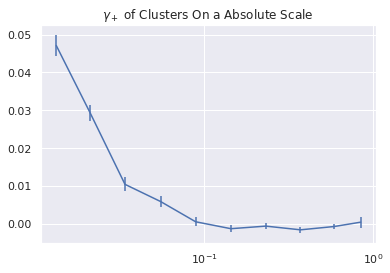

Aggregated xi:
[-74.3541 -96.568  -54.9511 -51.8296  -9.5902  26.6949  16.2183  64.852
  25.2328  -6.5631]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -6828.7228 -12722.1448 -17673.627  -25008.7117 -34585.9635 -44846.2807
 -49931.2637 -44189.503  -23020.9087  -1947.8307]
------------------------------------------------------------------------------
Aggregated npairs:
[ 1579.  3295.  5219.  8621. 14284. 23116. 34131. 44674. 43621. 11642.]
------------------------------------------------------------------------------
Mean xi:
[-0.0471 -0.0293 -0.0105 -0.006  -0.0007  0.0012  0.0005  0.0015  0.0006
 -0.0006]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3247 -3.861  -3.3864 -2.9009 -2.4213 -1.9401 -1.4629 -0.9892 -0.5277
 -0.1673]
------------------------------------------------------------------------------


In [20]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

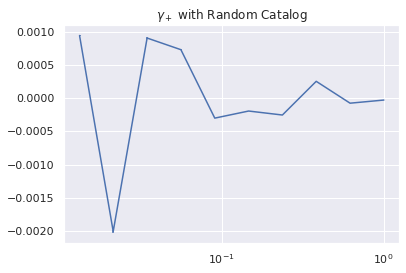

[ 9.4453e-04 -2.0084e-03  9.0635e-04  7.3067e-04 -3.0074e-04 -1.9385e-04
 -2.5387e-04  2.5391e-04 -7.5566e-05 -2.8266e-05]
[-8.4542e-06  1.7977e-05 -8.1125e-06 -6.5400e-06  2.6918e-06  1.7351e-06
  2.2724e-06 -2.2727e-06  6.7637e-07  2.5300e-07]


In [21]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

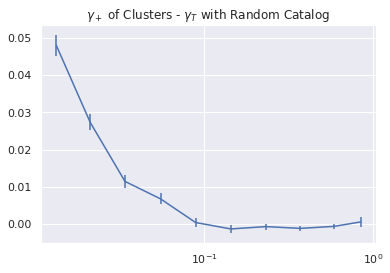

In [22]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

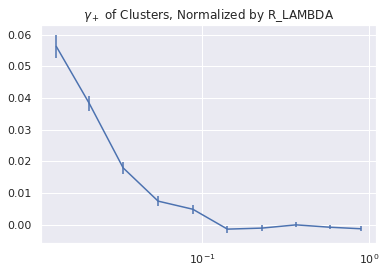

Aggregated xi:
[-48.2611 -92.0096 -74.8288 -49.6004 -53.4354  25.6062  30.6271   2.6497
  38.7549  41.1671]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -3701.7731  -9287.4847 -14159.6723 -19425.8204 -26695.692  -35382.4795
 -41488.9096 -40068.7812 -25359.6616  -3563.6713]
------------------------------------------------------------------------------
Aggregated npairs:
[  858.  2407.  4175.  6678. 10989. 18130. 28095. 39899. 47461. 31766.]
------------------------------------------------------------------------------
Mean xi:
[-5.6248e-02 -3.8226e-02 -1.7923e-02 -7.4274e-03 -4.8626e-03  1.4124e-03
  1.0901e-03  6.6410e-05  8.1656e-04  1.2959e-03]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3144 -3.8585 -3.3915 -2.9089 -2.4293 -1.9516 -1.4767 -1.0043 -0.5343
 -0.1122]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [23]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)